# Imports

In [51]:
print('Loading libraries')
start_time <- Sys.time()
suppressPackageStartupMessages({
    library(data.table)
    library(ggplot2)
    library(ggpubr)
    library(patchwork)
    library(plyr)
    library(dplyr)
    library(future)
    library(pheatmap)
    # library(ComplexHeatmap)
    library(RColorBrewer)
    # library(circlize)
    # library(ggplotify)
    library(stringr)
    library(rstatix)
    library(readxl)
    library(tidyr)
    }
)
print('Library load finished')
print(Sys.time()-start_time)


hpc =  TRUE
work_desktop = FALSE
work_linux = TRUE
singularity = TRUE
prj =  "HCC-CBS-162-Hillman-BFerris-18139-HN-Vectra"
if (!hpc){
    if (work_desktop){
        if (work_linux){
            base = paste0('/mnt/d/OneDrive - University of Pittsburgh/Internal_Project_Data_2/' ,prj)
        }else{
            base =paste0('D:\\OneDrive - University of Pittsburgh\\Internal_Project_Data_2\\', prj)
        }
    }else{
        base = paste0('/home/brian/data/odrive/Internal_Project_Data_2/',prj)
    }
}else{
    if (singularity){
        base = '/mnt'
    }else{
        base = paste0('/ix/rbao/Projects/', prj)
    }
}
print(base)
results <- file.path(base,'results')
info <- file.path(base,'sampleinfo')
print(results)
# df <- read.csv(file.path(results,'cell_density_52_paired_good_samples_all_inc_tumor_stroma_13_percent.csv'))
# df <- read.csv(file.path(results,'cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent.csv'))
# df <- read.csv(file.path(results,'cell_density_58_paired_good_samples_exclusive_tumor_stroma_16_percent.csv'))
# fn <- 'cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent_v2.csv'
fn <- 'cell_density_56_paired_good_samples_all_inc_tumor_stroma_19_percent_v4.csv'
#/mnt/results/cell_density_56_paired_good_samples_all_inc_tumor_stroma_34_counts_v4.csv

df <- read.csv(file.path(results,fn))

df$pt_id <- df$Study_ID
df$arm <- df$Regimen.assigned
df$time_point<-df$pre_post
head(df)
paired_pt =c(101, 104, 107, 108, 109, 111, 112, 113, 114, 116, 117,
             121, 123, 124, 125, 127, 128, 129, 130, 131, 133, 136, 137, 
             138, 139, 140, 141, 143) #119 insufficent tumor, 134 no pre, 130 no tumor in post (?)
use.df <- df %>% filter(Study_ID %in% paired_pt)
dim(use.df)
clin <- read_excel(file.path(info,'18_139_clinical_information.xlsx'),skip=1)
head(clin)

[1] "Loading libraries"
[1] "Library load finished"
Time difference of 0.0066576 secs
[1] "/mnt"
[1] "/mnt/results"


,Sample.Name,Study_ID,Regimen.assigned,pre_post,PDL1_tumor_percent,PDL1_stroma_percent,PDL1_all_percent,CD3.CD8.PD1neg_tumor_percent,CD3.CD8.PD1neg_stroma_percent,CD3.CD8.PD1neg_all_percent,⋯,CD3.CD8.PD1_all_percent,CD3.CD8.PDL1_tumor_percent,CD3.CD8.PDL1_stroma_percent,CD3.CD8.PDL1_all_percent,Treg_tumor_percent,Treg_stroma_percent,Treg_all_percent,pt_id,arm,time_point
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,PBC-PR-6545_1AFS_Scan1.qptiff,101,Nivo/Ipi,post,12.518305,27.920063,20.08386,0,0,0,⋯,0.07263169,0.01621271,0.3097836,0.1604282,0.4895193,4.8162691,2.6152729,101,Nivo/Ipi,post
2,101_pre_Scan1.qptiff,101,Nivo/Ipi,pre,28.682460,36.333288,32.68470,0,0,0,⋯,0.02138351,0.02989313,1.3557705,0.7234755,0.5754428,4.7894809,2.7798567,101,Nivo/Ipi,pre
3,PBC-PR-6546_4AFS_Scan1.qptiff,104,Nivo/Ipi,post,38.404810,41.145985,39.78120,0,0,0,⋯,0.38860009,0.29879603,1.9358632,1.1209618,1.5100917,5.2711805,3.3989749,104,Nivo/Ipi,post
4,104_Scan1.qptiff,104,Nivo/Ipi,pre,14.762243,8.495954,10.06951,0,0,0,⋯,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000,0.1665873,0.1247549,104,Nivo/Ipi,pre
5,107_pre_Scan1.qptiff,107,Nivo alone,pre,8.823529,21.149881,17.90484,0,0,0,⋯,1.13499570,0.07625272,1.2914770,0.9716251,1.4923747,9.4837982,7.3803382,107,Nivo alone,pre
6,107_sx_Scan1.qptiff,107,Nivo alone,post,19.727738,44.835463,29.22225,0,0,0,⋯,0.01635399,0.01880265,0.3148731,0.1308320,0.9062876,8.8905353,3.9272948,107,Nivo alone,post


[1] 56 22

New names:
• `` -> `...17`


Study_ID,Initials,DOB,HPV,Regimen assigned,Screen,HN#(pre),C1D1,Surgery,HN#(post),Path_response,Path_response_categories,Volumetric response (%change from baseline),RECIST Overall response,PD-L1,LAG3,...17
<chr>,<chr>,<dttm>,<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
101,AM,1957-08-11,HPV-,Nivo/Ipi,2019-12-20,HN19-9693,43839,43860,HN20-9717,0,pNR,54.5,PD,>1%,<1%,NA
102,DS,1959-02-09,HPV-,Nivo alone,2020-01-27,HN20-9712,43872,43903,HN20-9764,-10,pmPR,34.4,PD,NA,NA,Withdrew after completing treatment
103,DH,1967-12-10,HPV-,Nivo/Rela,2020-02-28,HN20-9745,43915,43949,"HN20-9795(2nd, 9805)",-10,pmPR,40.4,PD,>1%,>1%,NA
104,ML,1954-02-17,HPV-,Nivo/Ipi,2020-03-18,HN20-9768,43913,43936,HN20-9783,-70,pPR,-7.7,SD,<1%,>1%,NA
105,JL,NA,NA,Nivo alone,2020-05-01,HN20-9798,43959,NA,NA,NA,NA,NA,NA,NA,NA,Withdrew before surgery
106,DM,1949-10-14,HPV-,Nivo/Rela,2020-06-26,HN20-9856,44021,44043,HN20-9878,-10,pmPR,16.3,SD,<1%,>1%,NA


# Add path response categoreies

In [52]:
clin$Path_response[clin$Path_response =='NA'] = NA
clin <- drop_na(clin, 'Path_response')
dim(clin)
int_path <- as.numeric(clin$Path_response) * -1

pNR <- int_path == 0
pmR <- (int_path >= 10 & int_path <50)
pMR <- (int_path >= 50)
# clin[pMR,]
clin$resp_cat <- NA
clin$resp_cat[pNR] <- 'NR'
clin$resp_cat[pmR] <- 'MinR'
clin$resp_cat[pMR] <- 'MajR'
prg <- clin$Study_ID %in% c(110,132)
clin$resp_cat[prg] <- 'Prg'
clin$any_resp <- NA
clin$any_resp[prg] <- 'Prg'
clin$any_resp[pNR] <- 'NR'
clin$any_resp[clin$resp_cat %in% c('MinR','MajR')] <- 'R'
dim(use.df)
df_clin <- merge(x=use.df,y=clin,by='Study_ID',all.x=TRUE)
table(df_clin$resp_cat)
table(df_clin$any_resp)
dim(df_clin)
unique(df_clin$Path_response_categories)
table(df_clin$resp_cat)

[1] 34 17

[1] 56 22


MajR MinR   NR 
  14   18   24 


NR  R 
24 32 

[1] 56 40

[1] "pNR"  "pPR"  "pmPR" "pMPR" "pCR"


MajR MinR   NR 
  14   18   24 

## Save

In [53]:
fn <-file.path(results,'clin_cell_density_56_paired_good_samples_all_inc_tumor_stroma_19_percent_v4.csv')
print(fn)
write.csv(df_clin,fn)

[1] "/mnt/results/clin_cell_density_56_paired_good_samples_all_inc_tumor_stroma_19_percent_v4.csv"


In [45]:
fn <-file.path(results,'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent_v2.csv')
print(fn)
write.csv(df_clin,fn)

[1] "/mnt/results/clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent_v2.csv"


In [13]:
fn <-file.path(results,'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent.csv')
print(fn)
write.csv(df_clin,fn)

[1] "/mnt/results/clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent.csv"


In [10]:
fn <-file.path(results,'clin_cell_density_58_paired_good_samples_exclusive_tumor_stroma_16_percent.csv')
print(fn)
write.csv(df_clin,fn)

# Check CD8 percents across patients

Noticing: patient 104 has no CD3 cells in tumor pre. Manual inspection: can confirm no panCK stain and very little CD3 besides one patch of stroma

In [67]:
df_clin[df_clin$Study_ID==104, c('Treg_tumor_percent','CD8_tumor_percent','pre_post')]
df_clin[df_clin$Study_ID==138, c('Treg_tumor_percent','CD8_tumor_percent','pre_post')]
df_clin[df_clin$Study_ID==104, c('Treg_stroma_percent','CD8_stroma_percent','pre_post')]

ERROR: Error in `[.data.frame`(df_clin, df_clin$Study_ID == 104, c("Treg_tumor_percent", : undefined columns selected


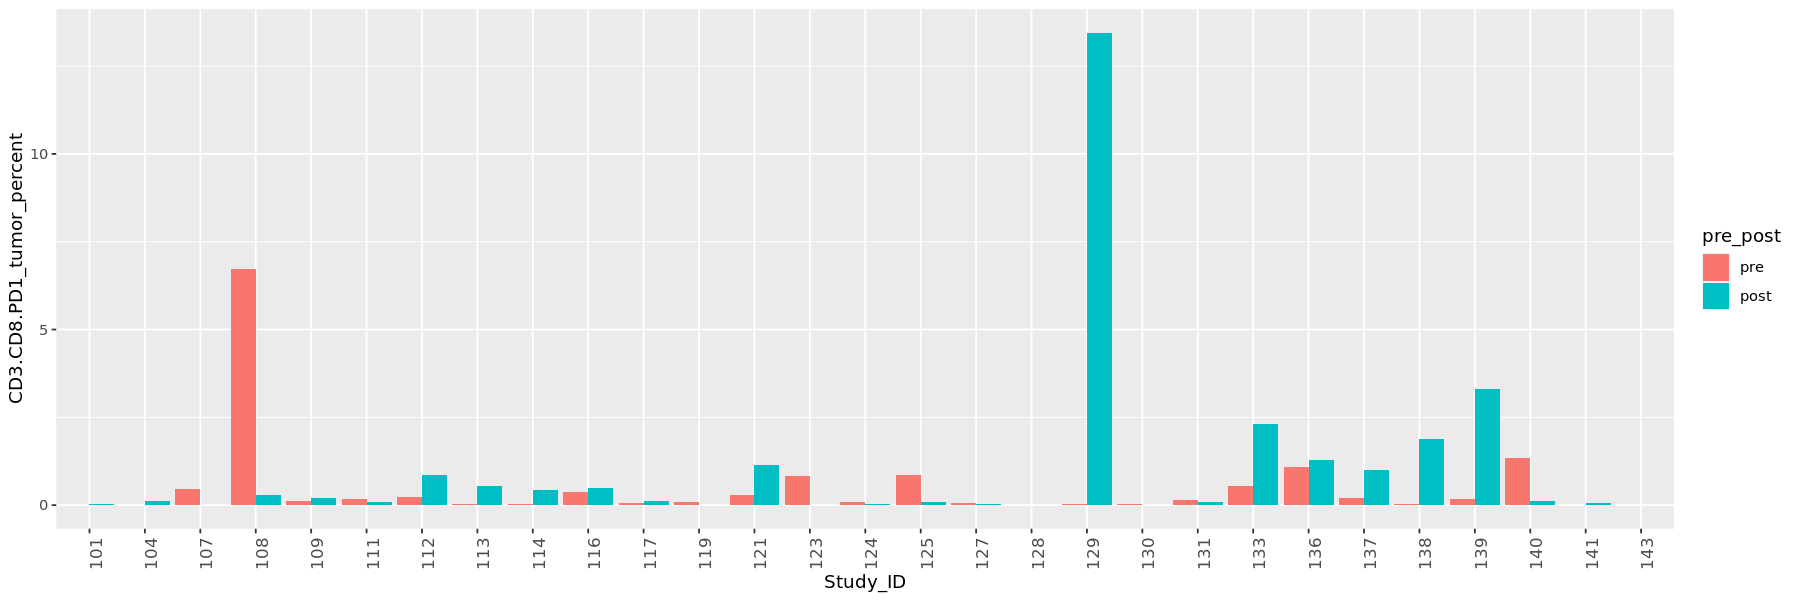

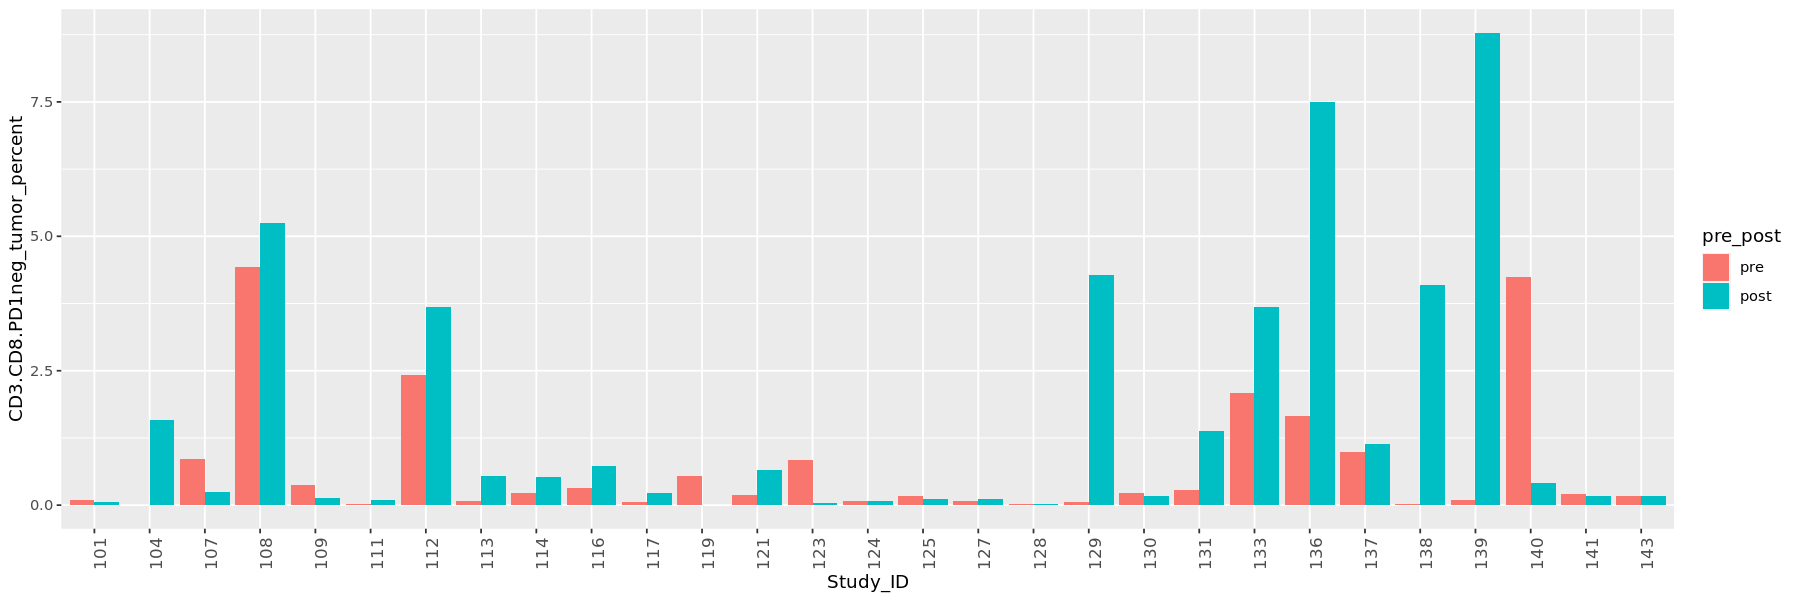

In [11]:
fn <- 'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent_v2.csv'
use.percents=c('CD3.CD8.PD1neg_tumor_percent','CD3.CD8.PD1neg_stroma_percent')
# df_clin <- read.csv(file.path(results,fn))
options(repr.plot.width=15,repr.plot.height=5)
d1 <- df_clin
d1$Study_ID <- factor(df_clin$Study_ID,
                         levels=as.factor(sort(unique(df_clin$Study_ID))))
d1$pre_post <- factor(df_clin$pre_post,
                      levels = c('pre','post'))
ggplot(d1, aes(x=Study_ID,
                 y=CD3.CD8.PD1_tumor_percent,
                    fill=pre_post)) +
       geom_bar(stat='identity',
                position = position_dodge(width = 0.9)) + 
       theme(axis.text.x = element_text(angle = 90, size = 10))

ggplot(d1, aes(x=Study_ID,
                 y=CD3.CD8.PD1neg_tumor_percent,
                    fill=pre_post)) +
       geom_bar(stat='identity',
                position = position_dodge(width = 0.9)) + 
       theme(axis.text.x = element_text(angle = 90, size = 10))

# Density by path response

## CD3+ CD8+ PD1-negative T responder v. nonresponder

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.04735869,0.047,0.047,*,T-test


`geom_smooth()` using formula = 'y ~ x'


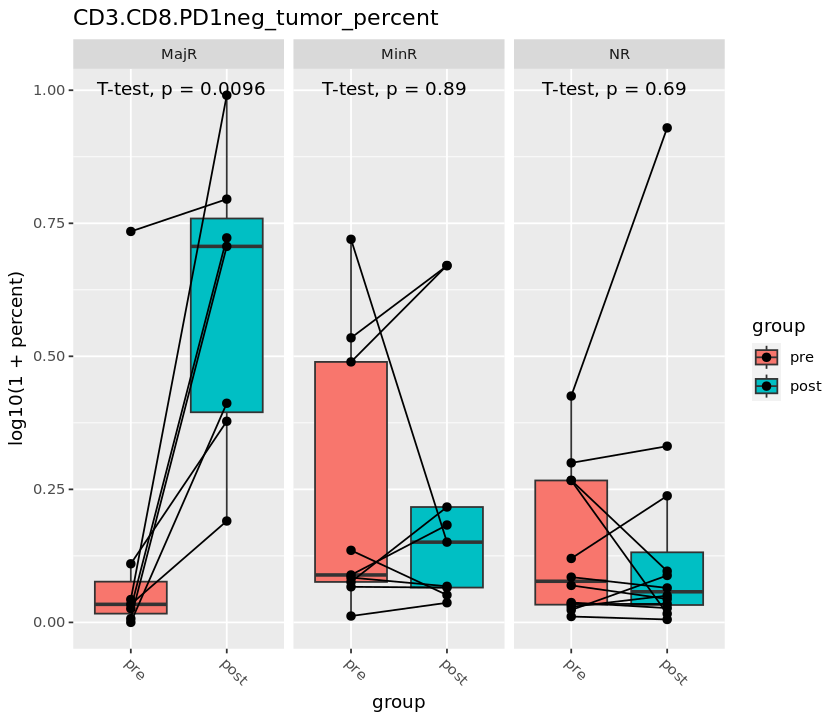

`geom_smooth()` using formula = 'y ~ x'


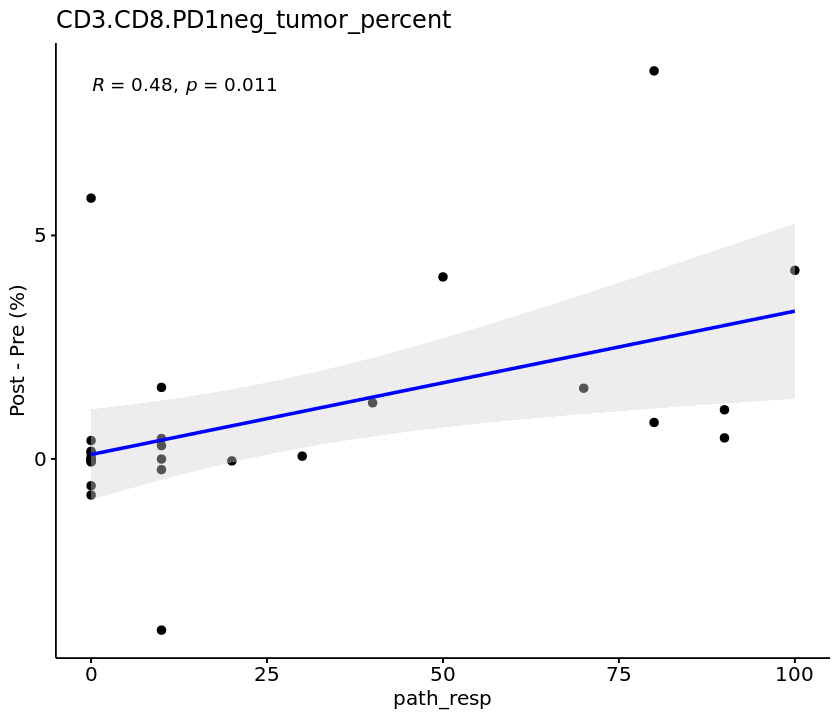

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.2597047,0.26,0.26,ns,T-test


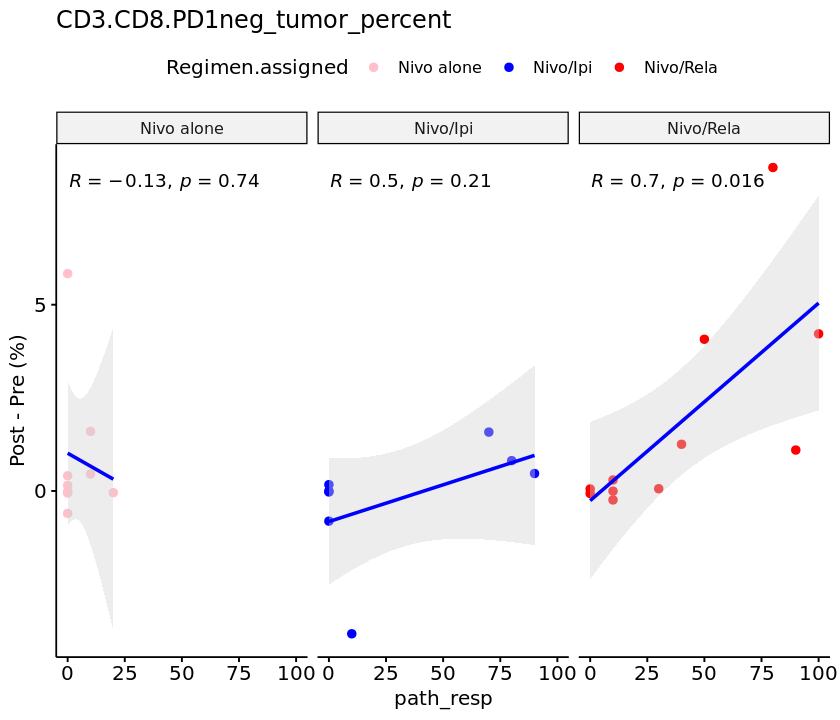

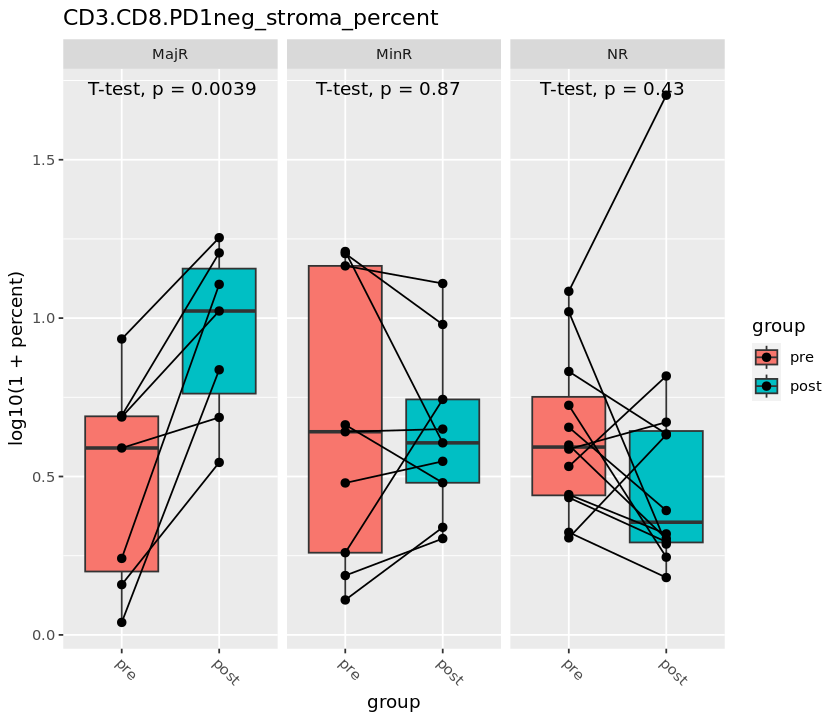

In [37]:
# fn <- 'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent.csv'
fn <- 'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent_v2.csv'
use.percents=c('CD3.CD8.PD1neg_tumor_percent','CD3.CD8.PD1neg_stroma_percent')
df_clin <- read.csv(file.path(results,fn))
use.df <- df_clin %>% filter(pt_id %in% paired_pt)

options(repr.plot.width=7,repr.plot.height=6)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
# d1$percent <- d1$CD8_tumor_percent
d1$percent <- d1[,use.percents[1]]
# d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(use.percents[1]) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

paired <- pivot_wider(d1[,c('Study_ID','group',
                        'Regimen.assigned',
                        'percent','Path_response')],
                      names_from="group", 
                values_from = "percent")
paired$diff <- paired$post - paired$pre
paired$path_resp <- as.numeric(paired$Path_response)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle(use.percents[1]) + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5

p1 <- ggscatter(paired, x = "path_resp", y = "diff",
    color="Regimen.assigned",
    palette = c("Nivo/Rela" = "red", "Nivo/Ipi" = "blue", "Nivo alone" = "pink"),
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle(use.percents[1]) + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") + 
    facet_wrap(~Regimen.assigned) #, label.x = 1.3, label.y = 1.5



# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
# d1$percent <- d1$CD8_stroma_percent
d1$percent <- d1[,use.percents[2]]
d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(use.percents[2]) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)



## CD3+ CD8+ PD1+ population

### Inclusive

In [ ]:
    gg_tbl <- data %>% 
        filter(gene.signature == use.sig) %>% 
        group_by(pt_ID) %>% 
        reframe(Timepoint = unique(Timepoint),
                Regimen = unique(Regimen),
                Patient = unique(Patient),
                path_resp = -1*as.integer(unique(path_response)),
              group = unique(response_cat),
              mean_sig = mean(ssgsea.score))
    paired_pt <- drop_na(pivot_wider(gg_tbl[,c('Patient','path_resp','Regimen','Timepoint','mean_sig')],
                names_from="Timepoint", 
                values_from = "mean_sig"))

[1] 56 38

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.3782388,0.38,0.38,ns,T-test


`geom_smooth()` using formula = 'y ~ x'


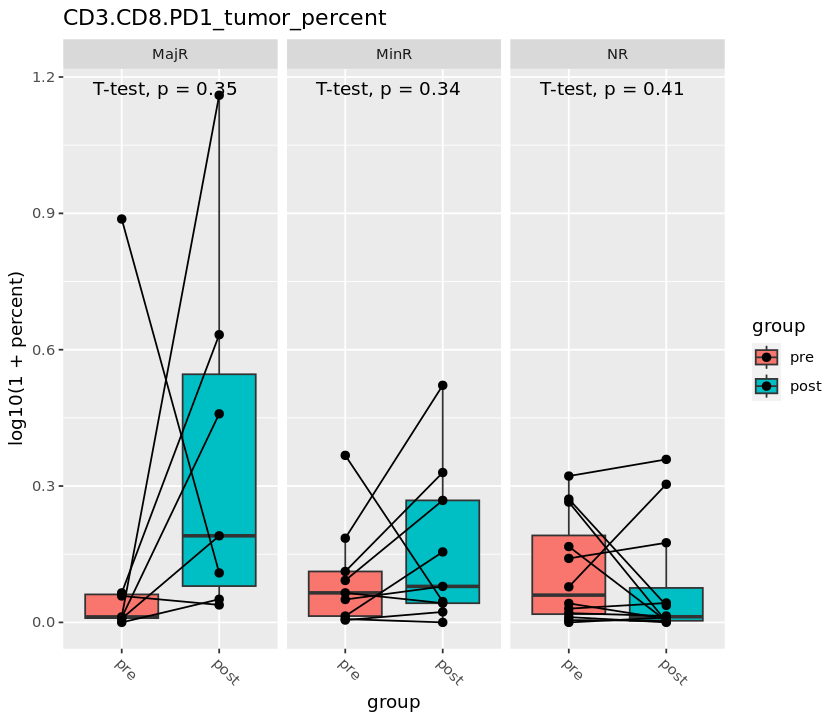

`geom_smooth()` using formula = 'y ~ x'


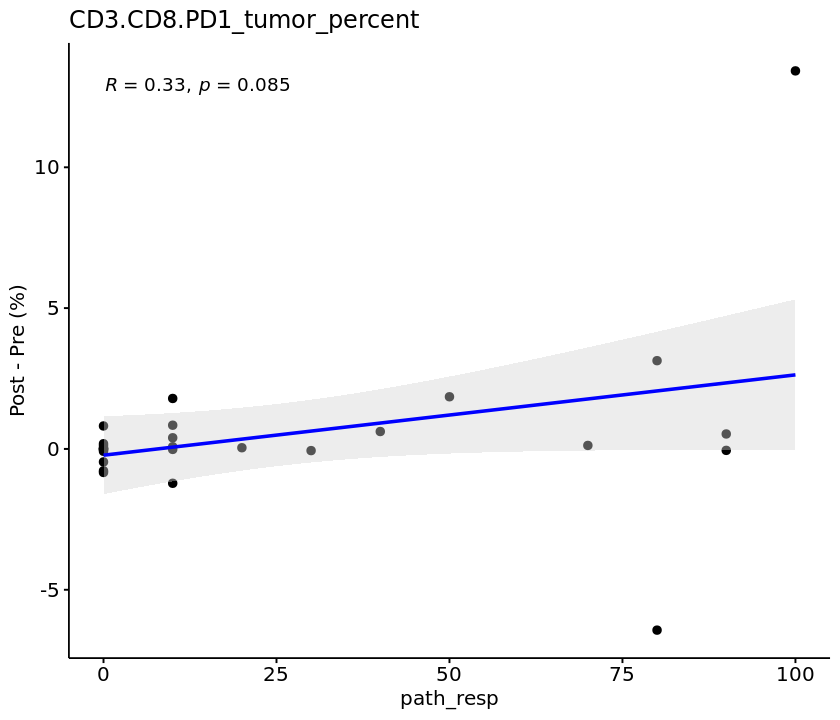

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.7626447,0.76,0.76,ns,T-test


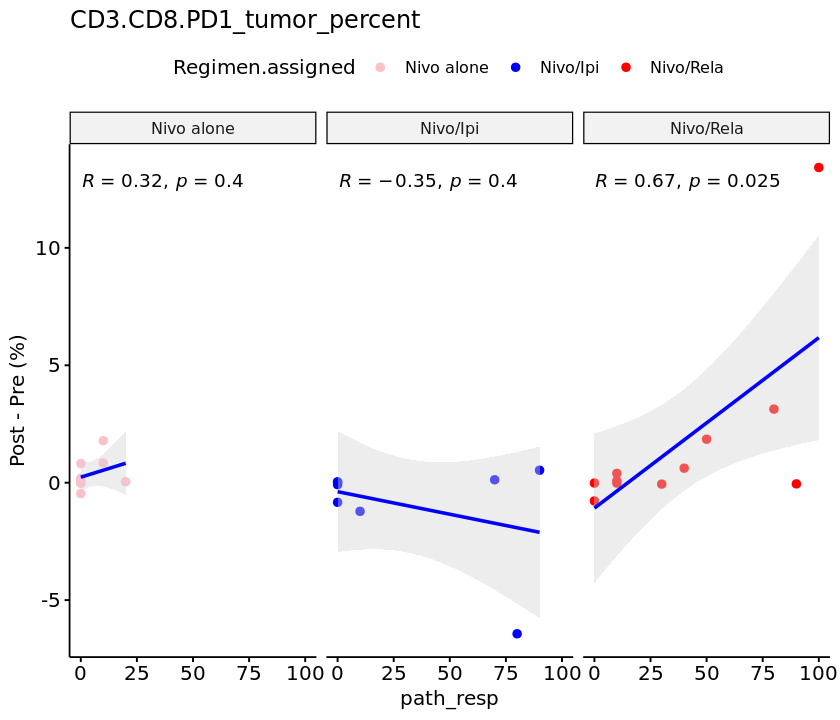

`geom_smooth()` using formula = 'y ~ x'


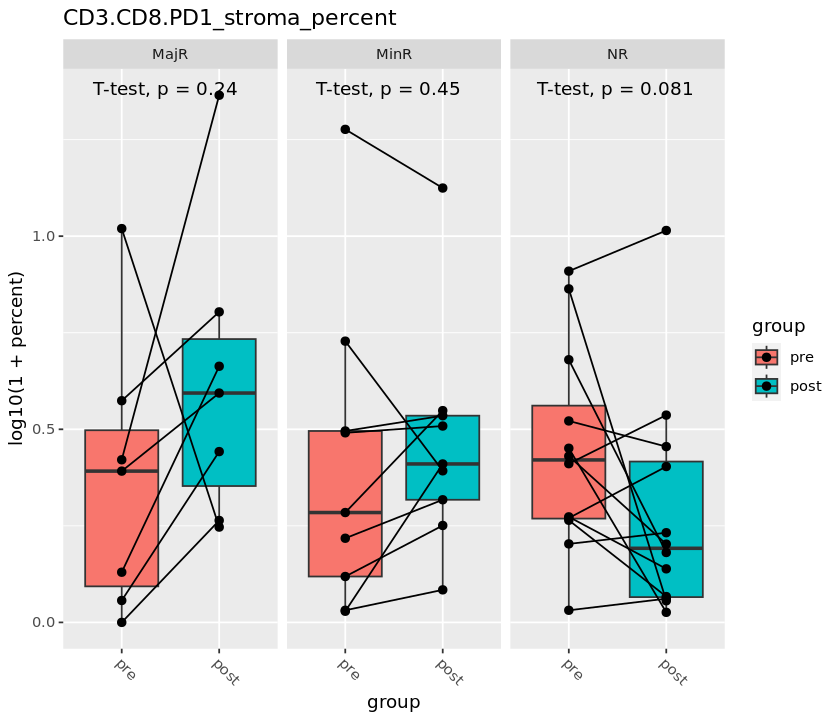

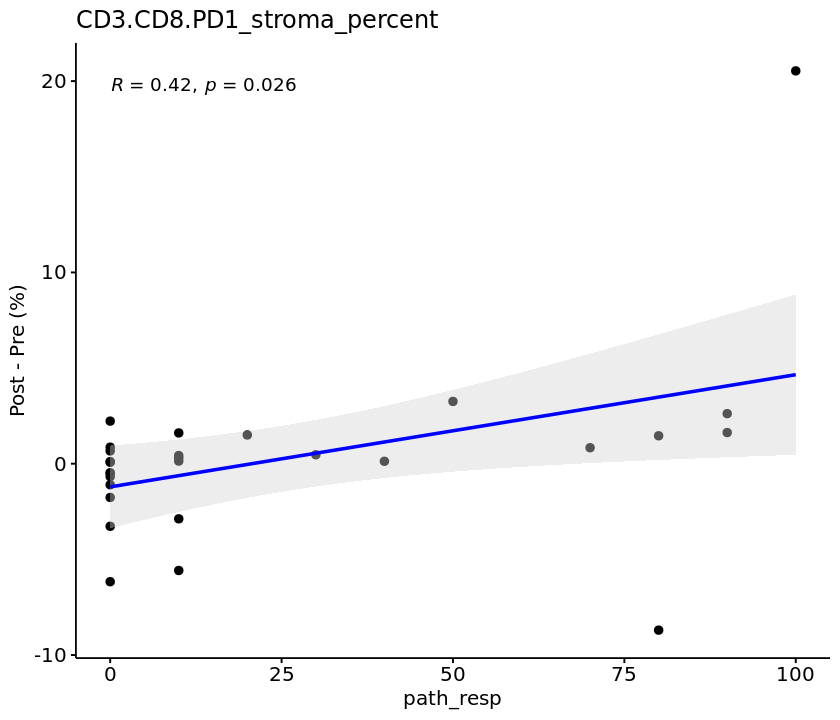

In [34]:
# fn <- 'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent.csv'
fn <- 'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent_v2.csv'
use.percents=c('CD3.CD8.PD1_tumor_percent','CD3.CD8.PD1_stroma_percent')
df_clin <- read.csv(file.path(results,fn))
use.df <- df_clin %>% filter(pt_id %in% paired_pt)
dim(use.df)
options(repr.plot.width=7,repr.plot.height=6)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1[,use.percents[1]]
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(use.percents[1]) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)


# paired <- reshape(d1[,c('Study_ID','group',
#                         'Regimen.assigned',
#                         'percent','Path_response')], 
#                   idvar = "Study_ID", timevar = "group", direction = "wide")
paired <- pivot_wider(d1[,c('Study_ID','group',
                        'Regimen.assigned',
                        'percent','Path_response')],
                      names_from="group", 
                values_from = "percent")
paired$diff <- paired$post - paired$pre
paired$path_resp <- as.numeric(paired$Path_response)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle(use.percents[1]) + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5

p1 <- ggscatter(paired, x = "path_resp", y = "diff",
    color="Regimen.assigned",
    palette = c("Nivo/Rela" = "red", "Nivo/Ipi" = "blue", "Nivo alone" = "pink"),
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle(use.percents[1]) + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") + 
    facet_wrap(~Regimen.assigned) #, label.x = 1.3, label.y = 1.5


# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1[,use.percents[2]]
d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(use.percents[2]) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

paired <- reshape(d1[,c('Study_ID','group','percent','Path_response')], idvar = "Study_ID", timevar = "group", direction = "wide")
paired$diff <- paired$percent.post - paired$percent.pre
paired$path_resp <- as.numeric(paired$Path_response.post)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle(use.percents[2]) + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5


## CD3+ CD8+ PD1+ all together:

In [52]:
colnames(df.counts)

[1] "Study_ID"                                   
 [2] "Sample.Name"                                
 [3] "Regimen.assigned"                           
 [4] "pre_post"                                   
 [5] "PDL1_tumor_counts"                          
 [6] "PDL1_tumor_denominator"                     
 [7] "PDL1_stroma_counts"                         
 [8] "PDL1_stroma_denominator"                    
 [9] "PDL1_all_counts"                            
[10] "PDL1_all_denominator"                       
[11] "CD8_tumor_counts"                           
[12] "CD8_tumor_denominator"                      
[13] "CD8_stroma_counts"                          
[14] "CD8_stroma_denominator"                     
[15] "CD8_all_counts"                             
[16] "CD8_all_denominator"                        
[17] "CD8_PD1_tumor_counts"                       
[18] "CD8_PD1_tumor_denominator"                  
[19] "CD8_PD1_stroma_counts"                      
[20] "CD8_PD1_stroma_denominator"                 
[21] "CD8_PD1_all_counts"                         
[22] "CD8_PD1_all_denominator"                    
[23] "Treg_tumor_counts"                          
[24] "Treg_tumor_denominator"                     
[25] "Treg_stroma_counts"                         
[26] "Treg_stroma_denominator"                    
[27] "Treg_all_counts"                            
[28] "Treg_all_denominator"                       
[29] "pt_id"                                      
[30] "arm"                                        
[31] "time_point"                                 
[32] "Initials"                                   
[33] "DOB"                                        
[34] "HPV"                                        
[35] "Regimen assigned"                           
[36] "Screen"                                     
[37] "HN#(pre)"                                   
[38] "C1D1"                                       
[39] "Surgery"                                    
[40] "HN#(post)"                                  
[41] "Path_response"                              
[42] "Path_response_categories"                   
[43] "Volumetric response (%change from baseline)"
[44] "RECIST Overall response"                    
[45] "PD-L1"                                      
[46] "LAG3"                                       
[47] "...17"                                      
[48] "resp_cat"                                   
[49] "any_resp"                                   
[50] "group"

## Found problems with inform export values of cd8 density in patient 108 (blood cells in pre):

[1] "tissue_id"              "CD8_CD3_tumor_percent"  "CD8_CD3_stroma_percent"
 [4] "CD8_CD3_all_percent"    "Treg_tumor_percent"     "Treg_stroma_percent"   
 [7] "Treg_all_percent"       "PDL1_tumor_percent"     "PDL1_stroma_percent"   
[10] "PDL1_all_percent"

[1] 56 31

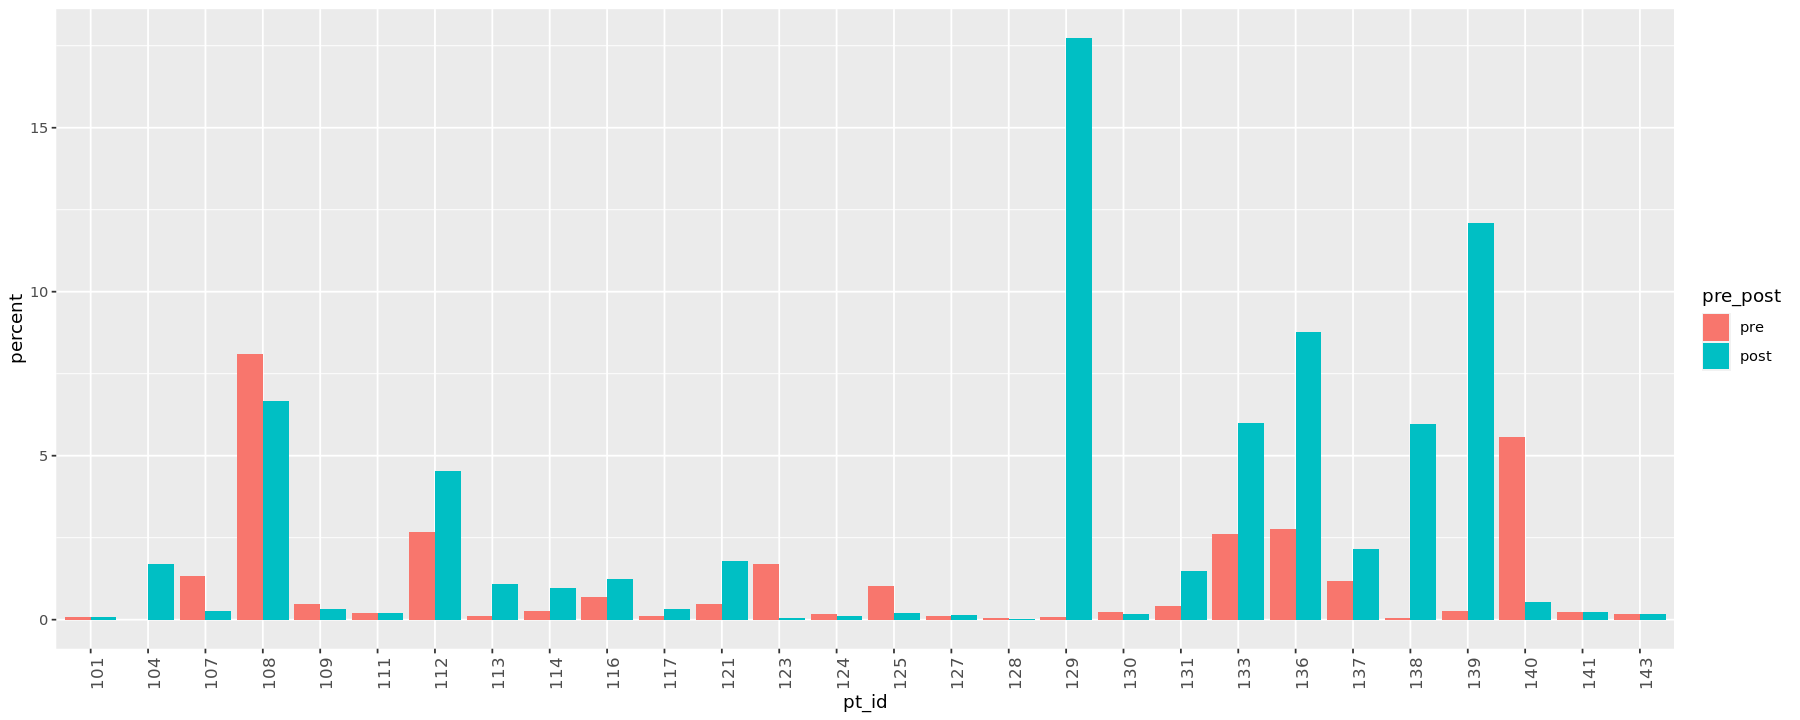

`geom_smooth()` using formula = 'y ~ x'


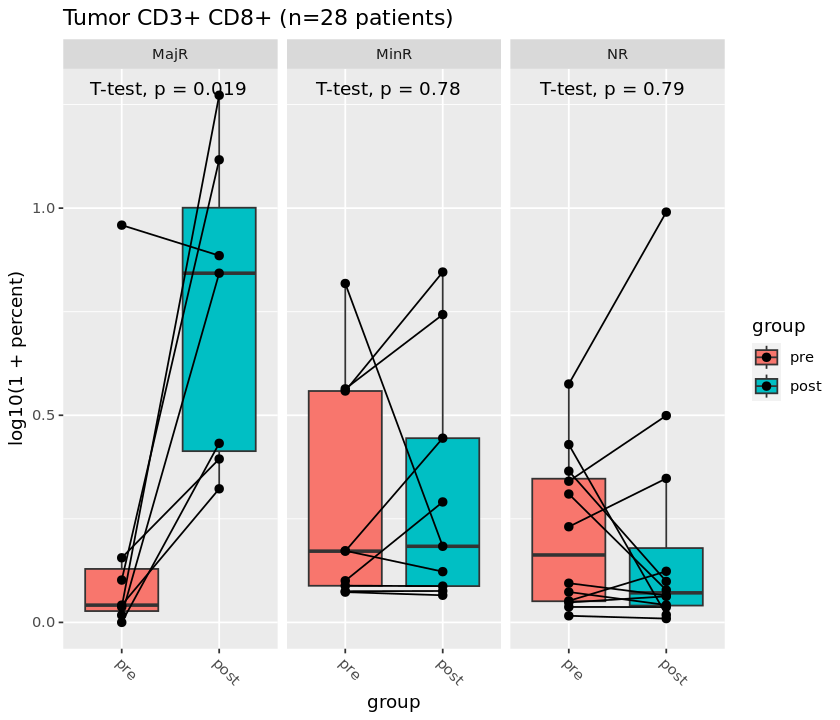

`geom_smooth()` using formula = 'y ~ x'


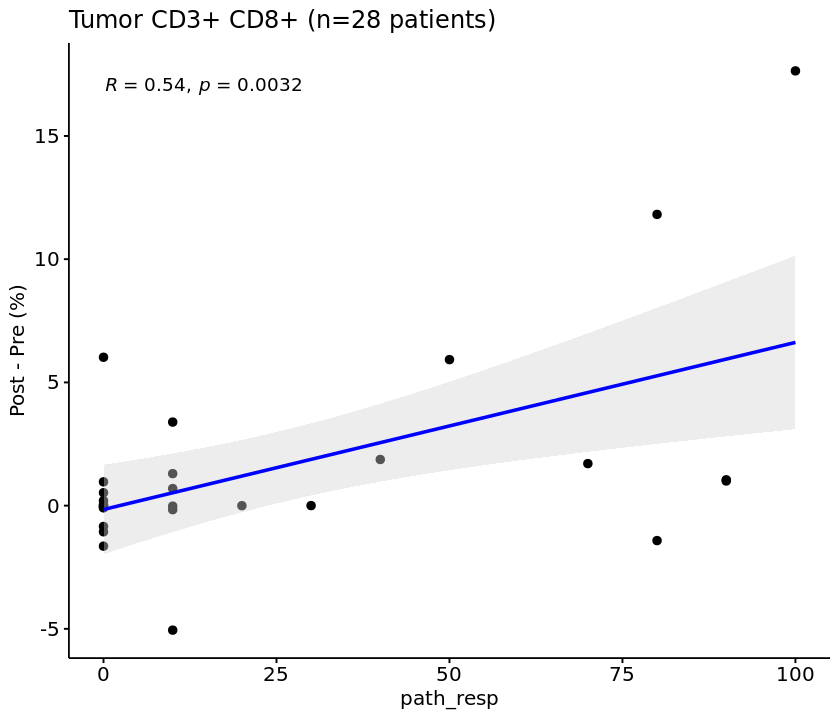

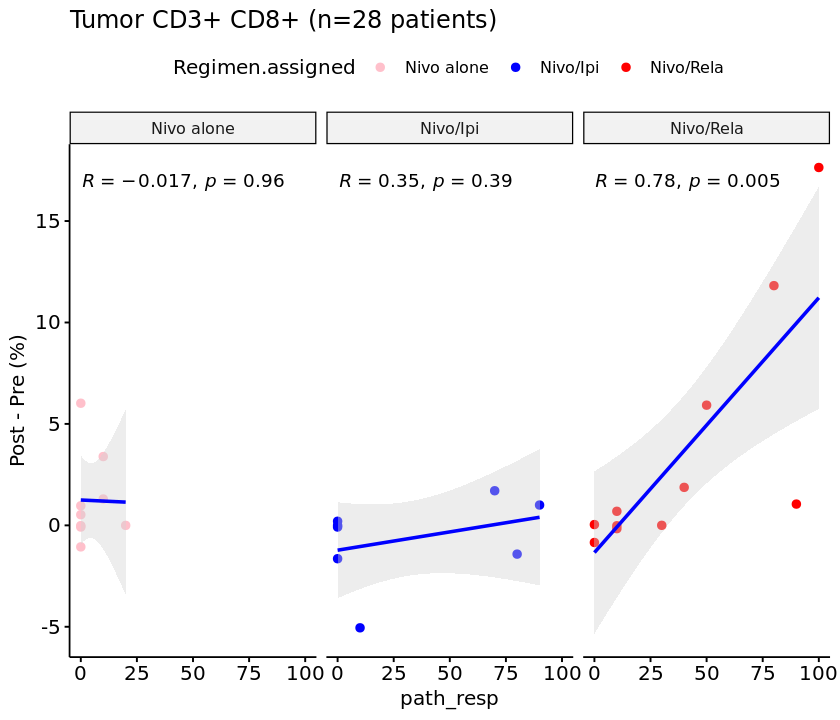

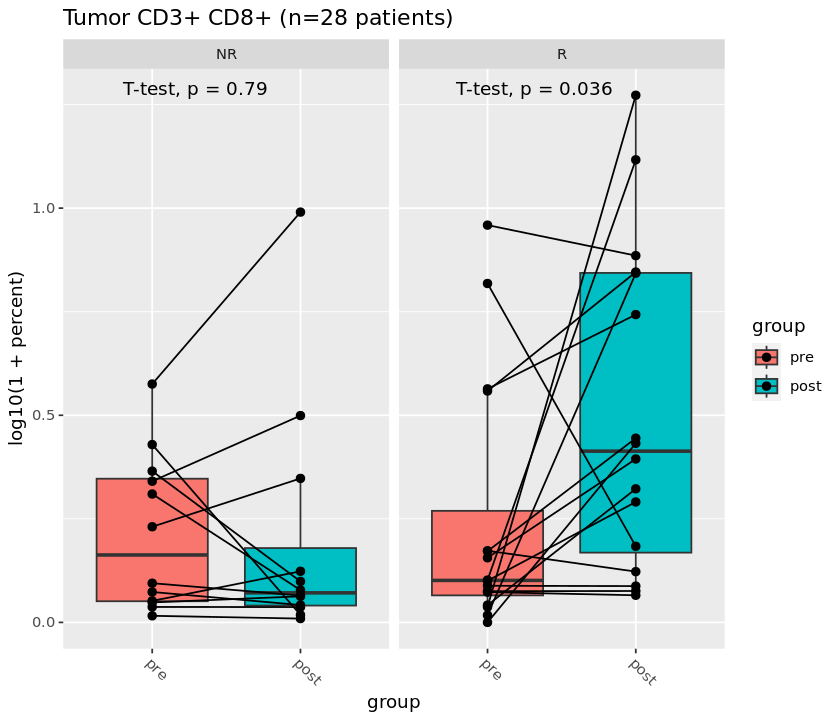

`geom_smooth()` using formula = 'y ~ x'


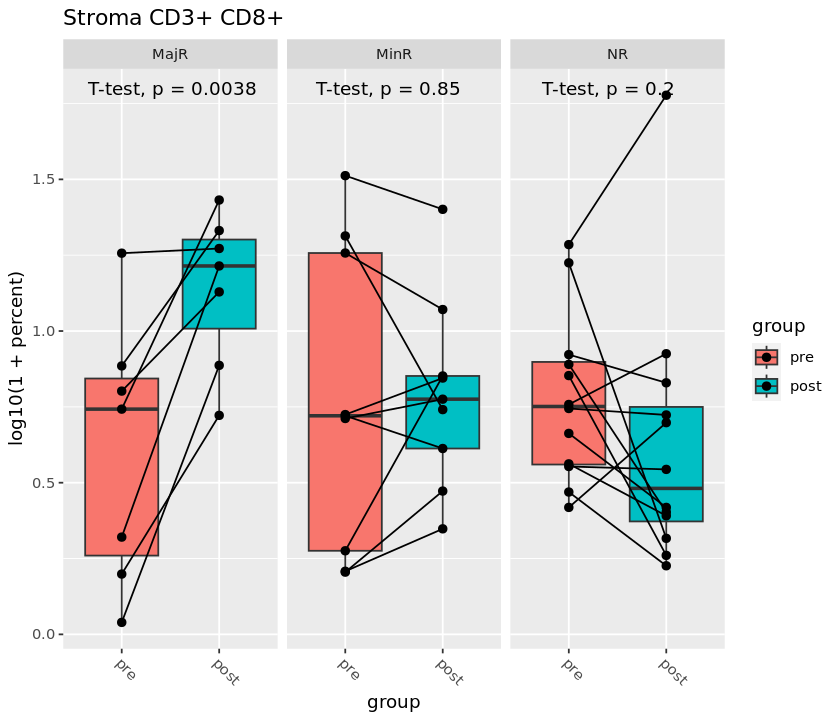

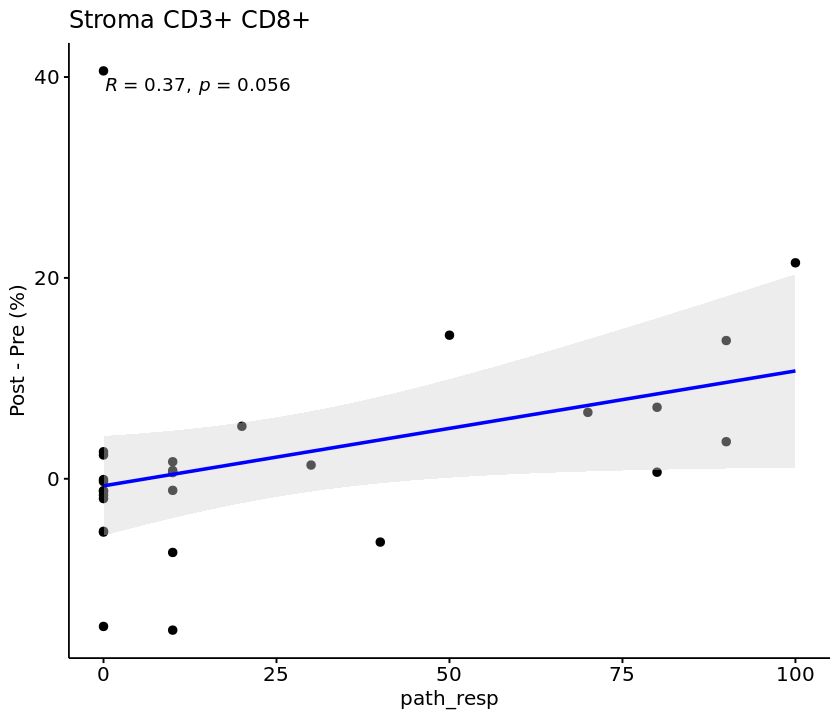

In [35]:
use_qupath_108 <- TRUE
drop_108 <- FALSE
df.counts <- read.csv(file.path(results,'cell_density_58_paired_good_samples_all_inc_tumor_stroma_28_counts_v2.csv'))
df.sup <- read.csv(file.path(results,'qupath_cell_density_4_samples_all_inc_tumor_stroma_10_percent.csv'))
row.names(df.sup)<-df.sup$tissue_id
# colnames(df.sup)
df.counts$pt_id<- factor(df.counts$Study_ID,
                         levels=as.factor(sort(unique(df.counts$Study_ID))))
df.counts$pre_post <- factor(df.counts$pre_post,
                      levels = c('pre','post'))
df.counts$arm <- df.counts$Regimen.assigned
df.counts$time_point<-df.counts$pre_post
df.counts <- df.counts %>% filter(pt_id %in% paired_pt)

dim(df.counts)
df.counts <- merge(df.counts,clin,how='left',by='Study_ID')
df.counts$group <- factor(df.counts$time_point, levels=c('pre','post'))

d1 <- df.counts
d1$percent <- (d1$CD3.CD8.PD1_tumor_counts + d1$CD3.CD8.PD1neg_tumor_counts) / d1$CD3.CD8.PD1_tumor_denominator * 100

if (use_qupath_108){
    idx <- d1$pt_id == '108' & d1$time_point == 'pre'
    d1[idx,'percent'] <- df.sup['108_pre','CD8_CD3_tumor_percent']
    idx <- d1$pt_id == '108' & d1$time_point == 'post'
    d1[idx,'percent'] <- df.sup['108_post','CD8_CD3_tumor_percent']
}
if (drop_108){
    idx <- !(d1$pt_id == '108')
    d1 <- d1[idx,]
    }
n_pt = length(unique(df.counts$pt_id))
options(repr.plot.width=15,repr.plot.height=6)
ggplot(d1, aes(x=pt_id,
                 y=percent,
                    fill=pre_post)) +
       geom_bar(stat='identity',
                position = position_dodge(width = 0.9)) + 
       theme(axis.text.x = element_text(angle = 90, size = 10))
# compare_means(ratio ~ group, data = d1, paired = TRUE,
#              method = "t.test")
options(repr.plot.width=7,repr.plot.height=6)
ggplot(d1, aes(x=group,
                 y=log10(1+percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(sprintf('Tumor CD3+ CD8+ (n=%d patients)',n_pt)) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)


paired <- pivot_wider(d1[,c('Study_ID','group',
                        'Regimen.assigned',
                        'percent','Path_response')],
                      names_from="group", 
                values_from = "percent")
paired$diff <- paired$post - paired$pre
paired$path_resp <- as.numeric(paired$Path_response)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle(sprintf('Tumor CD3+ CD8+ (n=%d patients)',n_pt)) + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5

p1 <- ggscatter(paired, x = "path_resp", y = "diff",
    color="Regimen.assigned",
    palette = c("Nivo/Rela" = "red", "Nivo/Ipi" = "blue", "Nivo alone" = "pink"),
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle(sprintf('Tumor CD3+ CD8+ (n=%d patients)',n_pt)) + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") + 
    facet_wrap(~Regimen.assigned) #, label.x = 1.3, label.y = 1.5


# paired <- reshape(d1[,c('Study_ID','group','percent','Path_response')], idvar = "Study_ID", timevar = "group", direction = "wide")
# paired$diff <- paired$percent.post - paired$percent.pre
# paired$path_resp <- as.numeric(paired$Path_response.post)*-1
# p1 <- ggscatter(paired, x = "path_resp", y = "diff",
#    add = "reg.line",  # Add regressin line
#    add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
#    conf.int = TRUE # Add confidence interval
#    ) +  ggtitle(sprintf('Tumor CD3+ CD8+ (n=%d patients)',n_pt)) +
#     ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
# p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5

ggplot(d1, aes(x=group,
                 y=log10(1+percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(sprintf('Tumor CD3+ CD8+ (n=%d patients)',n_pt)) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~any_resp)

d1$percent <- (d1$CD3.CD8.PD1_stroma_counts + d1$CD3.CD8.PD1neg_stroma_counts) / d1$CD3.CD8.PD1_stroma_denominator * 100
options(repr.plot.width=7,repr.plot.height=6)
ggplot(d1, aes(x=group,
                 y=log10(1+percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma CD3+ CD8+') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

paired <- reshape(d1[,c('Study_ID','group','percent','Path_response')], idvar = "Study_ID", timevar = "group", direction = "wide")
paired$diff <- paired$percent.post - paired$percent.pre
paired$path_resp <- as.numeric(paired$Path_response.post)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle('Stroma CD3+ CD8+') + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5

## Scatter version with all

In [10]:
use_qupath_108 <- TRUE
drop_108 <- FALSE
df.counts <- read.csv(file.path(results,'cell_density_58_paired_good_samples_all_inc_tumor_stroma_28_counts_v2.csv'))
df.sup <- read.csv(file.path(results,'qupath_cell_density_4_samples_all_inc_tumor_stroma_10_percent.csv'))
row.names(df.sup)<-df.sup$tissue_id
# colnames(df.sup)
df.counts$pt_id<- factor(df.counts$Study_ID,
                         levels=as.factor(sort(unique(df.counts$Study_ID))))
df.counts$pre_post <- factor(df.counts$pre_post,
                      levels = c('pre','post'))
df.counts$arm <- df.counts$Regimen.assigned
df.counts$time_point<-df.counts$pre_post
df.counts <- df.counts %>% filter(pt_id %in% paired_pt)

dim(df.counts)
df.counts <- merge(df.counts,clin,how='left',by='Study_ID')
df.counts$group <- factor(df.counts$time_point, levels=c('pre','post'))

d1 <- df.counts
d1$percent <- (d1$CD3.CD8.PD1_tumor_counts + d1$CD3.CD8.PD1neg_tumor_counts) / d1$CD3.CD8.PD1_tumor_denominator * 100

if (use_qupath_108){
    idx <- d1$pt_id == '108' & d1$time_point == 'pre'
    d1[idx,'percent'] <- df.sup['108_pre','CD8_CD3_tumor_percent']
    idx <- d1$pt_id == '108' & d1$time_point == 'post'
    d1[idx,'percent'] <- df.sup['108_post','CD8_CD3_tumor_percent']
}
if (drop_108){
    idx <- !(d1$pt_id == '108')
    d1 <- d1[idx,]
    }
n_pt = length(unique(df.counts$pt_id))


[1] 56 31

In [11]:
colnames(d1)

[1] "Study_ID"                                   
 [2] "Sample.Name"                                
 [3] "Regimen.assigned"                           
 [4] "pre_post"                                   
 [5] "PDL1_tumor_counts"                          
 [6] "PDL1_tumor_denominator"                     
 [7] "PDL1_stroma_counts"                         
 [8] "PDL1_stroma_denominator"                    
 [9] "PDL1_all_counts"                            
[10] "PDL1_all_denominator"                       
[11] "CD3.CD8.PD1neg_tumor_counts"                
[12] "CD3.CD8.PD1neg_tumor_denominator"           
[13] "CD3.CD8.PD1neg_stroma_counts"               
[14] "CD3.CD8.PD1neg_stroma_denominator"          
[15] "CD3.CD8.PD1neg_all_counts"                  
[16] "CD3.CD8.PD1neg_all_denominator"             
[17] "CD3.CD8.PD1_tumor_counts"                   
[18] "CD3.CD8.PD1_tumor_denominator"              
[19] "CD3.CD8.PD1_stroma_counts"                  
[20] "CD3.CD8.PD1_stroma_denominator"             
[21] "CD3.CD8.PD1_all_counts"                     
[22] "CD3.CD8.PD1_all_denominator"                
[23] "Treg_tumor_counts"                          
[24] "Treg_tumor_denominator"                     
[25] "Treg_stroma_counts"                         
[26] "Treg_stroma_denominator"                    
[27] "Treg_all_counts"                            
[28] "Treg_all_denominator"                       
[29] "pt_id"                                      
[30] "arm"                                        
[31] "time_point"                                 
[32] "Initials"                                   
[33] "DOB"                                        
[34] "HPV"                                        
[35] "Regimen assigned"                           
[36] "Screen"                                     
[37] "HN#(pre)"                                   
[38] "C1D1"                                       
[39] "Surgery"                                    
[40] "HN#(post)"                                  
[41] "Path_response"                              
[42] "Path_response_categories"                   
[43] "Volumetric response (%change from baseline)"
[44] "RECIST Overall response"                    
[45] "PD-L1"                                      
[46] "LAG3"                                       
[47] "...17"                                      
[48] "resp_cat"                                   
[49] "any_resp"                                   
[50] "group"                                      
[51] "percent"

`geom_smooth()` using formula = 'y ~ x'


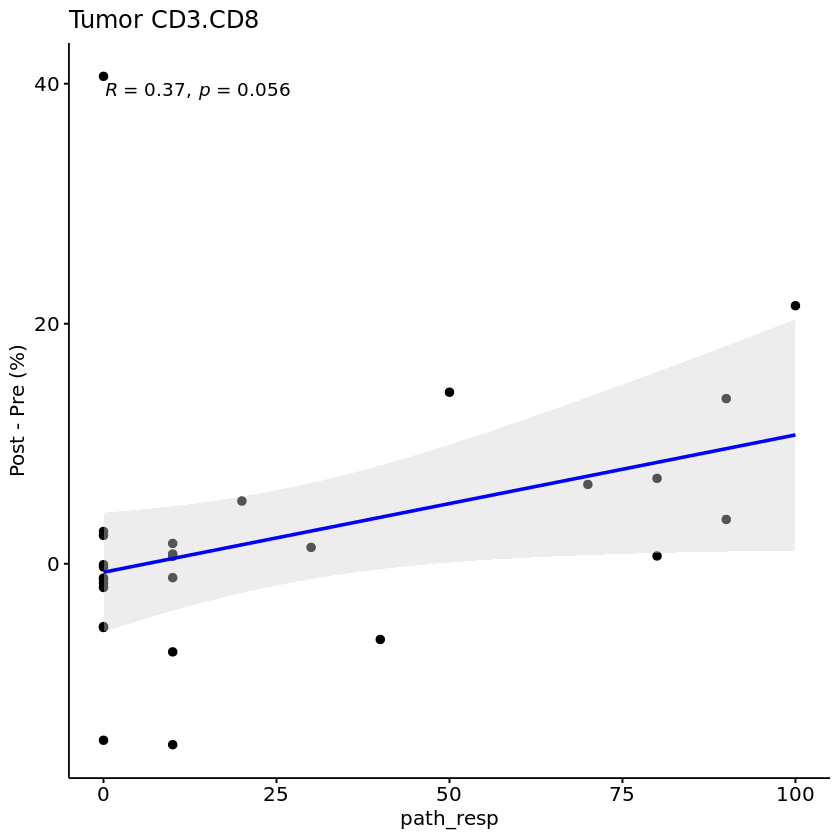

In [23]:
options(repr.plot.width=7,repr.plot.height=7)
paired <- reshape(d1[,c('Study_ID','group','percent','Path_response')], idvar = "Study_ID", timevar = "group", direction = "wide")
paired$cd3.cd8.diff <- paired$percent.post - paired$percent.pre
paired$path_resp <- as.numeric(paired$Path_response.post)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "cd3.cd8.diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle('Tumor CD3.CD8') + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5)


## Find high PD1 samples

In [41]:
use.df <- df_clin %>% filter(pt_id %in% paired_pt)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$CD8_PD1_tumor_percent
d2 <- d1[,c('Study_ID','group','percent')] %>% 
    tidyr::pivot_wider(names_from = group, values_from = percent)
d2 <- data.frame(d2)
row.names(d2) <- d2$Study_ID
idx = min(d2$post - d2$pre) == (d2$post - d2$pre)
d2[idx,]

use.df <- df_clin %>% filter(pt_id %in% paired_pt)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$CD8_PD1_tumor_percent
d2 <- d1[,c('Study_ID','group','percent')] %>% 
    tidyr::pivot_wider(names_from = group, values_from = percent)
d2 <- data.frame(d2)
row.names(d2) <- d2$Study_ID
idx = abs(d2$post - d2$pre)> 1
d2[idx,]
d1[d1$Study_ID==129,]
d1[d1$Study_ID==108,]

,Study_ID,post,pre
,<int>,<dbl>,<dbl>
108,108,0.2849091,6.71785


,Study_ID,post,pre
,<int>,<dbl>,<dbl>
108,108,0.2849091,6.71785029
129,129,13.4500991,0.02816108
133,133,2.3237179,0.53191489
138,138,1.8766756,0.02453586
139,139,3.2949370,0.16123928
140,140,0.1113698,1.33064516


,X,Study_ID,Sample.Name,Regimen.assigned,pre_post,PDL1_tumor_percent,PDL1_stroma_percent,PDL1_all_percent,CD8_tumor_percent,CD8_stroma_percent,⋯,Path_response_categories,Volumetric.response...change.from.baseline.,RECIST.Overall.response,PD.L1,LAG3,...17,resp_cat,any_resp,group,percent
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
37,37,129,129_pre_Scan1.qptiff,Nivo/Rela,pre,64.803768,35.747559,51.845123,0.06144236,2.890690,⋯,pCR,-3,SD,>1%,>1%,NA,MajR,R,pre,0.02816108
38,38,129,129_sx_Scan1.qptiff,Nivo/Rela,post,4.576999,5.635866,5.241193,4.27957700,3.858175,⋯,pCR,-3,SD,>1%,>1%,NA,MajR,R,post,13.45009914


,X,Study_ID,Sample.Name,Regimen.assigned,pre_post,PDL1_tumor_percent,PDL1_stroma_percent,PDL1_all_percent,CD8_tumor_percent,CD8_stroma_percent,⋯,Path_response_categories,Volumetric.response...change.from.baseline.,RECIST.Overall.response,PD.L1,LAG3,...17,resp_cat,any_resp,group,percent
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
7,7,108,108_pre_Scan1.qptiff,Nivo/Ipi,pre,6.909789,16.96432,14.83513,4.428297,7.592886,⋯,pPR,16.7,SD,NA,NA,no tumor on stained slide,MajR,R,pre,6.7178503
8,8,108,PBC-PR-6547_1F_Scan1.qptiff,Nivo/Ipi,post,20.014865,23.66184,22.48670,5.242947,16.943190,⋯,pPR,16.7,SD,NA,NA,no tumor on stained slide,MajR,R,post,0.2849091


## Treg

In [34]:
colnames(df_clin)

[1] "Study_ID"                                   
 [2] "Sample.Name"                                
 [3] "Regimen.assigned"                           
 [4] "pre_post"                                   
 [5] "PDL1_tumor_percent"                         
 [6] "PDL1_stroma_percent"                        
 [7] "PDL1_all_percent"                           
 [8] "CD3.CD8.PD1neg_tumor_percent"               
 [9] "CD3.CD8.PD1neg_stroma_percent"              
[10] "CD3.CD8.PD1neg_all_percent"                 
[11] "CD3.CD8.PD1_tumor_percent"                  
[12] "CD3.CD8.PD1_stroma_percent"                 
[13] "CD3.CD8.PD1_all_percent"                    
[14] "Treg_tumor_percent"                         
[15] "Treg_stroma_percent"                        
[16] "Treg_all_percent"                           
[17] "pt_id"                                      
[18] "arm"                                        
[19] "time_point"                                 
[20] "Initials"                                   
[21] "DOB"                                        
[22] "HPV"                                        
[23] "Regimen assigned"                           
[24] "Screen"                                     
[25] "HN#(pre)"                                   
[26] "C1D1"                                       
[27] "Surgery"                                    
[28] "HN#(post)"                                  
[29] "Path_response"                              
[30] "Path_response_categories"                   
[31] "Volumetric response (%change from baseline)"
[32] "RECIST Overall response"                    
[33] "PD-L1"                                      
[34] "LAG3"                                       
[35] "...17"                                      
[36] "resp_cat"                                   
[37] "any_resp"

In [53]:
df.sup$Treg_tumor_percent

[1] 3.0015617 0.9078952 1.0055461 1.3816156

In [55]:
d1$percent

[1]  4.8162691  4.7894809  0.1665873  5.2711805  8.8905353  9.4837982
 [7] 10.7154693  6.6219148 12.8987727 10.0512164  2.6219817  4.8133832
[13]  5.4441691  8.5880273  3.3849745  8.9858793  3.7404478  5.0184455
[19]  7.4036350  6.2694365  4.6442578  4.2728976 11.1095890  1.6485134
[25]  2.2284484  4.9221671  9.3120107  0.1925722  4.5122232 13.1602507
[31]  2.2053392  4.2719202  7.1868102  9.3714140  1.9017219  5.6929924
[37]  4.8401506  2.3539754  4.2115486  4.1780391  9.0361936  9.2719723
[43] 15.3338829  5.9883721  7.3113277  0.3799693  6.2528337  9.3387453
[49]  3.6959554  9.1441970  2.5505351  5.9003052 11.5776182  7.2644973
[55]  8.1132075  1.9721035  5.8770414  4.4514388

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.7897418,0.79,0.79,ns,T-test


`geom_smooth()` using formula = 'y ~ x'


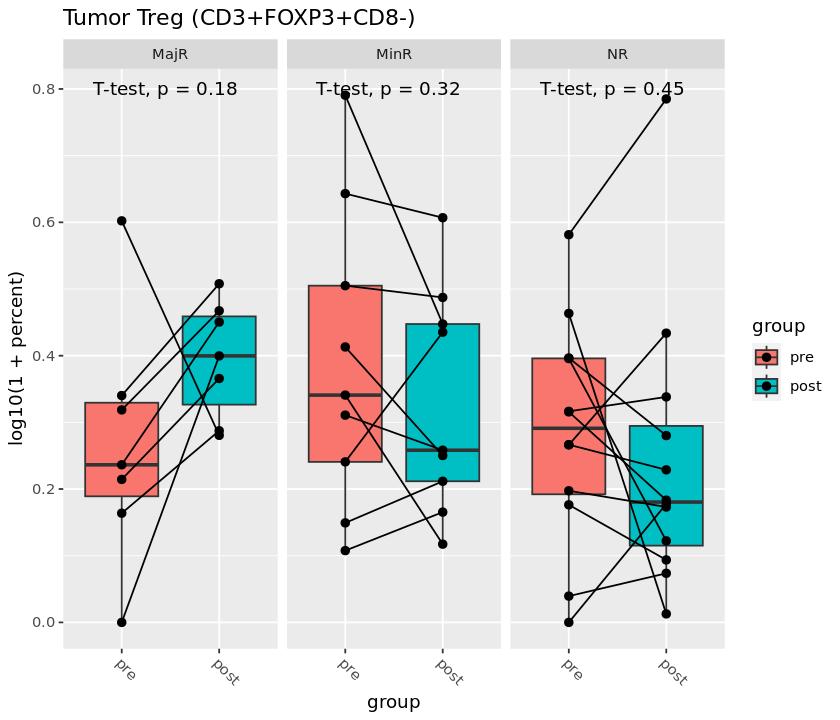

`geom_smooth()` using formula = 'y ~ x'


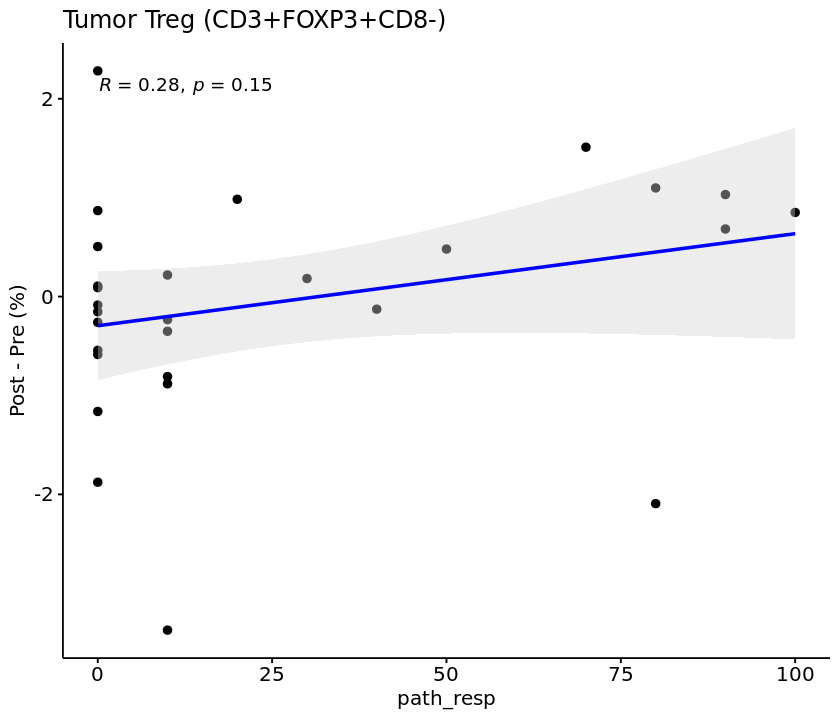

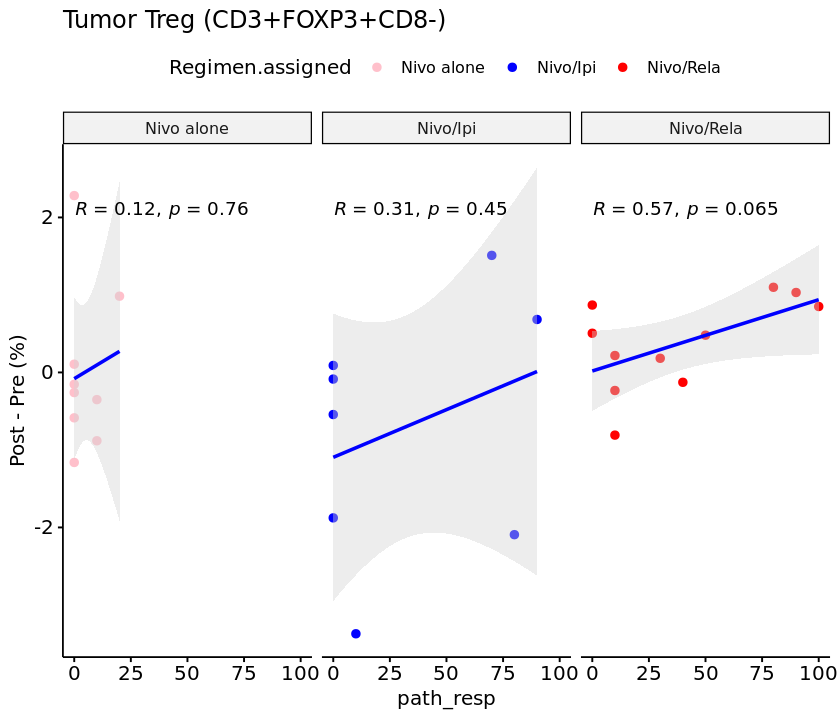

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.3335063,0.33,0.33,ns,T-test


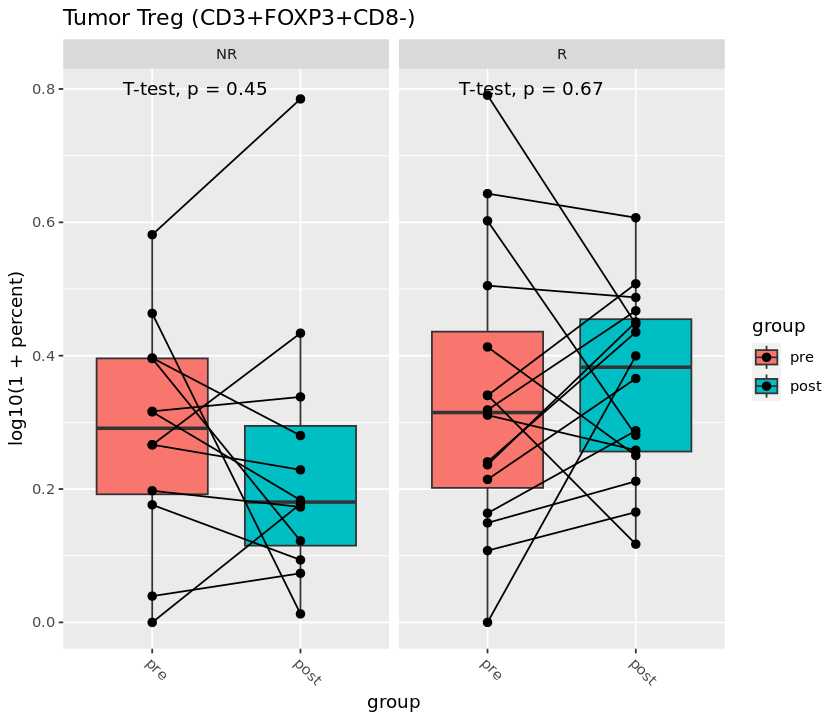

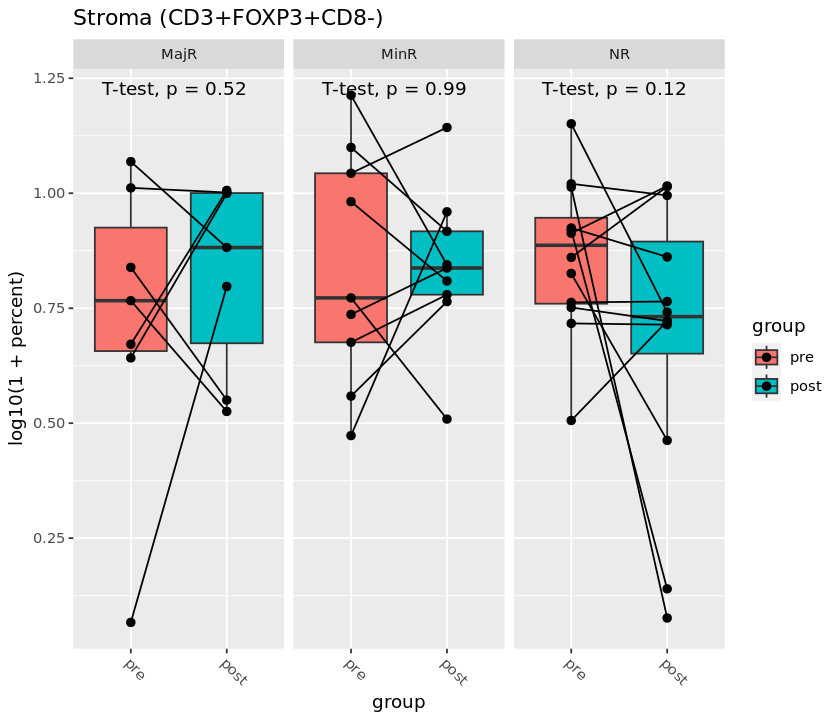

In [36]:
fn <- 'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent_v2.csv'
use.percents=c('Treg_tumor_percent','Treg_stroma_percent')
df_clin <- read.csv(file.path(results,fn))
df.sup <- read.csv(file.path(results,'qupath_cell_density_4_samples_all_inc_tumor_stroma_10_percent.csv'))
row.names(df.sup)<-df.sup$tissue_id

use.df <- df_clin %>% filter(pt_id %in% paired_pt)
use_qupath_108 <- TRUE# Note--> ultimately this needs to be examined more closely
drop_108 <- FALSE
options(repr.plot.width=7,repr.plot.height=6)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1[,use.percents[1]]

if (use_qupath_108){
    idx <- d1$pt_id == '108' & d1$time_point == 'pre'
    d1$percent[idx] <- df.sup['108_pre','Treg_tumor_percent']
    idx <- d1$pt_id == '108' & d1$time_point == 'post'
    d1$percent[idx] <- df.sup['108_post','Treg_tumor_percent']
}


if (drop_108){
    idx <- !(d1$pt_id == '108')
    d1 <- d1[idx,]
    }
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor Treg (CD3+FOXP3+CD8-)') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

# options(repr.plot.width=7,repr.plot.height=7)
paired <- pivot_wider(d1[,c('Study_ID','group',
                        'Regimen.assigned',
                        'percent','Path_response')],
                      names_from="group", 
                values_from = "percent")
paired$diff <- paired$post - paired$pre
paired$path_resp <- as.numeric(paired$Path_response)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle('Tumor Treg (CD3+FOXP3+CD8-)') + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5

p1 <- ggscatter(paired, x = "path_resp", y = "diff",
    color="Regimen.assigned",
    palette = c("Nivo/Rela" = "red", "Nivo/Ipi" = "blue", "Nivo alone" = "pink"),
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle('Tumor Treg (CD3+FOXP3+CD8-)') + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") + 
    facet_wrap(~Regimen.assigned) #, label.x = 1.3, label.y = 1.5


ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor Treg (CD3+FOXP3+CD8-)') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~any_resp)



# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1[,use.percents[2]]

compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma (CD3+FOXP3+CD8-)') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)



## PDL1

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.5075149,0.51,0.51,ns,T-test


`geom_smooth()` using formula = 'y ~ x'


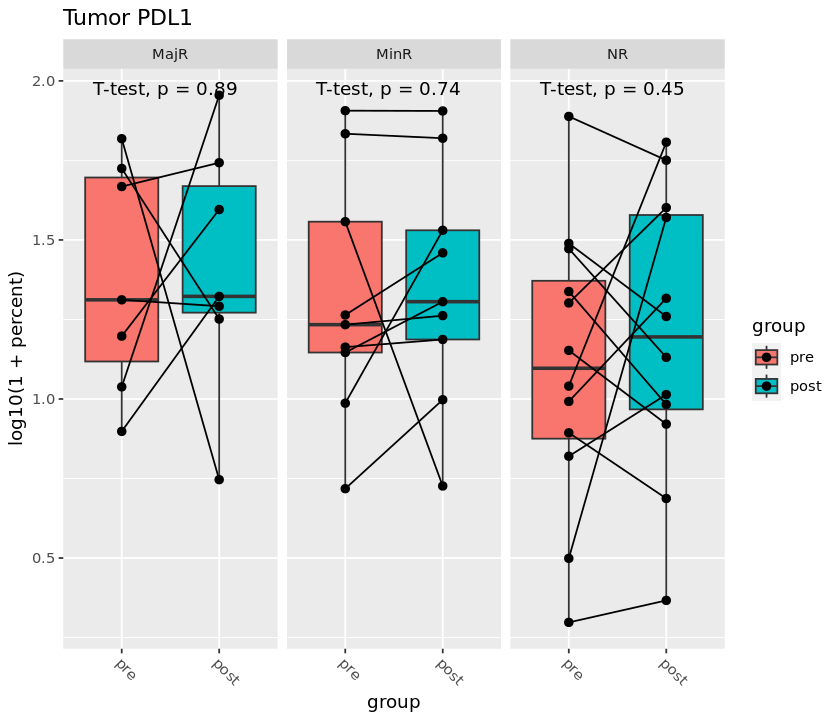

`geom_smooth()` using formula = 'y ~ x'


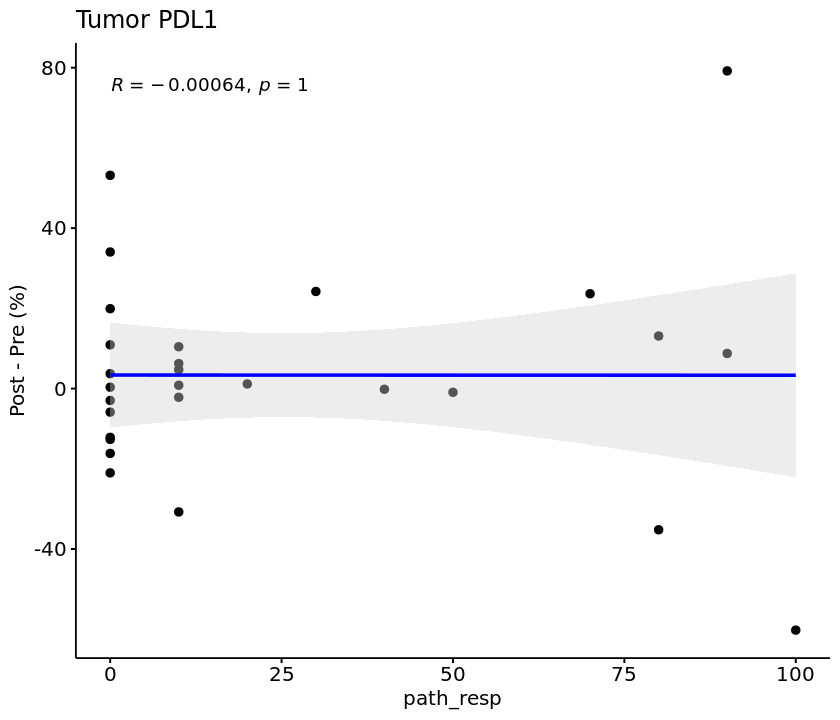

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.08781694,0.088,0.088,ns,T-test


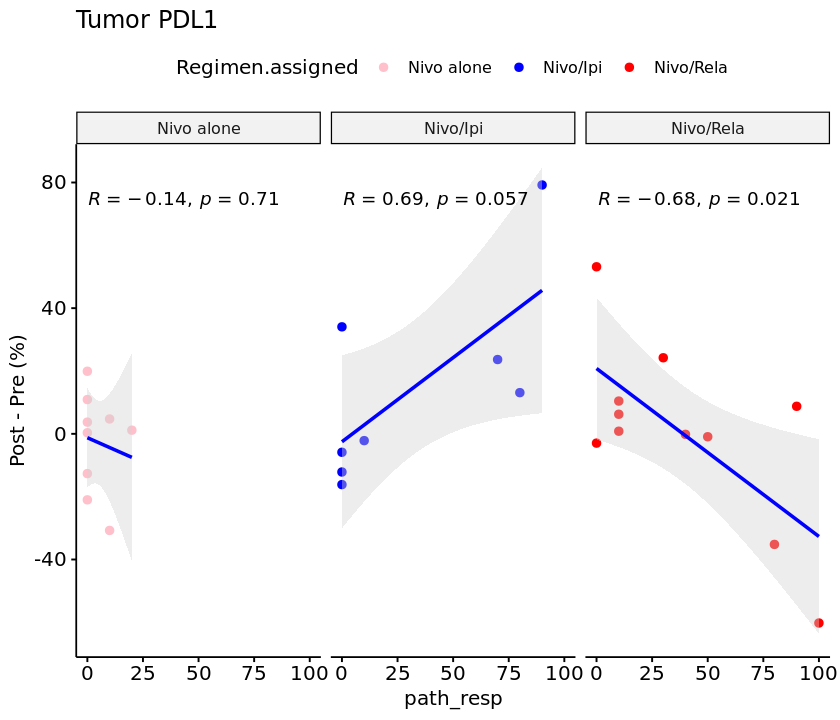

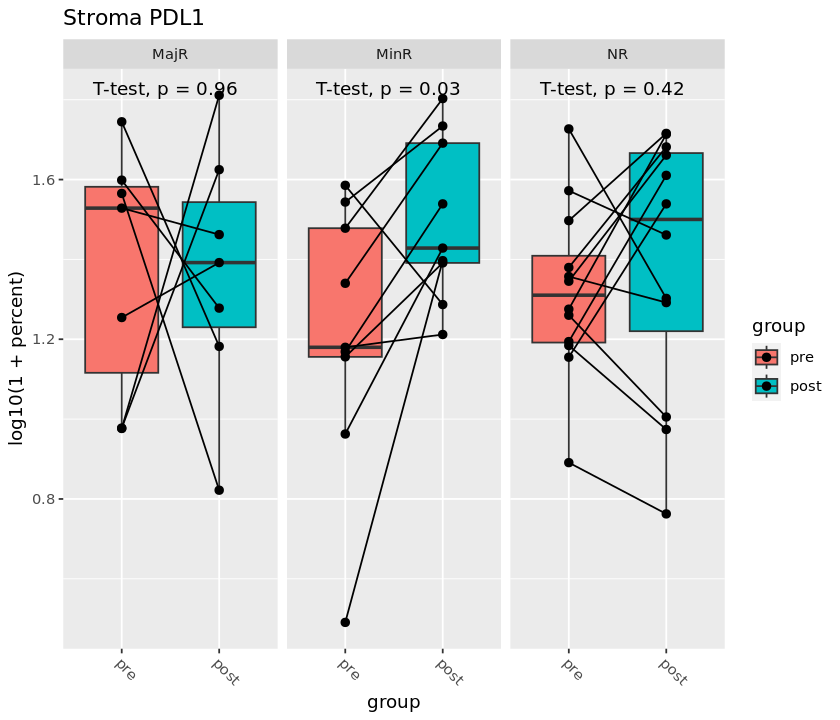

In [56]:
# fn <- 'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent_v2.csv'
fn <- 'clin_cell_density_56_paired_good_samples_all_inc_tumor_stroma_19_percent_v4.csv'
use.percents=c('PDL1_tumor_percent','PDL1_stroma_percent')
df_clin <- read.csv(file.path(results,fn))
use.df <- df_clin %>% filter(pt_id %in% paired_pt)

options(repr.plot.width=7,repr.plot.height=6)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1[,use.percents[1]]
# d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor PDL1') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

paired <- pivot_wider(d1[,c('Study_ID','group',
                        'Regimen.assigned',
                        'percent','Path_response')],
                      names_from="group", 
                values_from = "percent")
paired$diff <- paired$post - paired$pre
paired$path_resp <- as.numeric(paired$Path_response)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle('Tumor PDL1') + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5

p1 <- ggscatter(paired, x = "path_resp", y = "diff",
    color="Regimen.assigned",
    palette = c("Nivo/Rela" = "red", "Nivo/Ipi" = "blue", "Nivo alone" = "pink"),
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle('Tumor PDL1') + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") + 
    facet_wrap(~Regimen.assigned) #, label.x = 1.3, label.y = 1.5


# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1[,use.percents[2]]
d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma PDL1') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)



## PDL1+ CD8 Tcells

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.1655105,0.17,0.17,ns,T-test


`geom_smooth()` using formula = 'y ~ x'


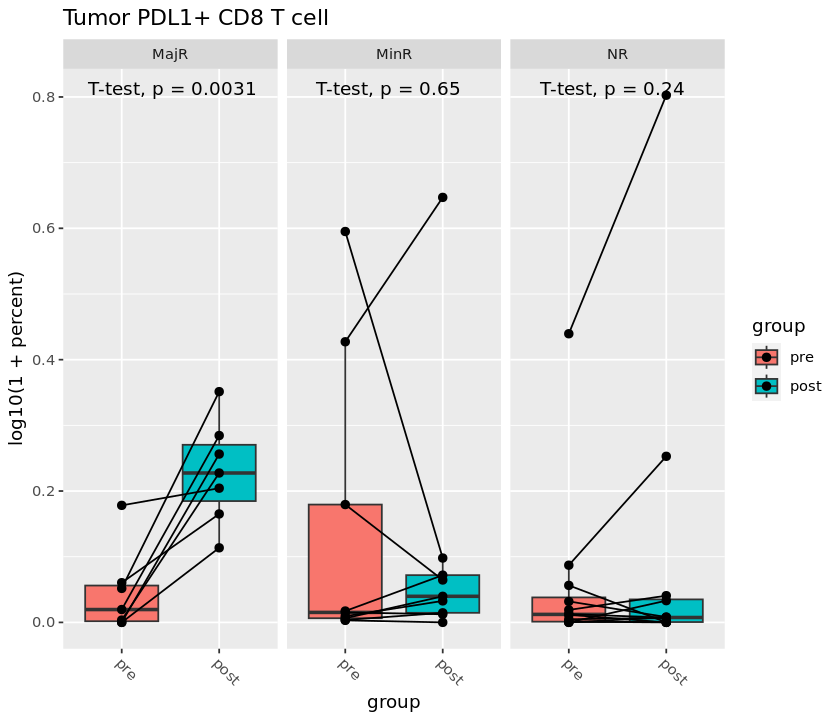

`geom_smooth()` using formula = 'y ~ x'


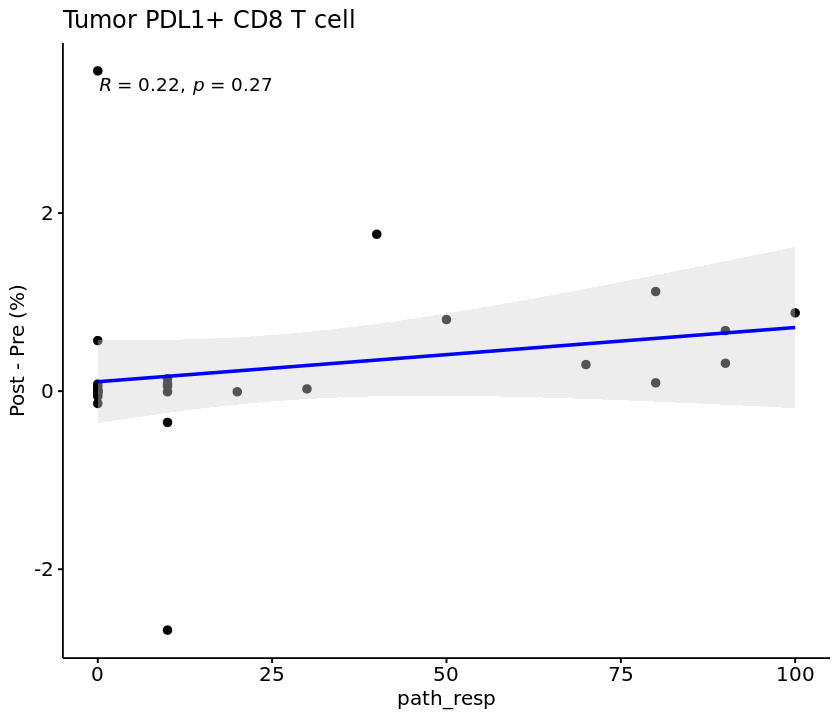

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.4123234,0.41,0.41,ns,T-test


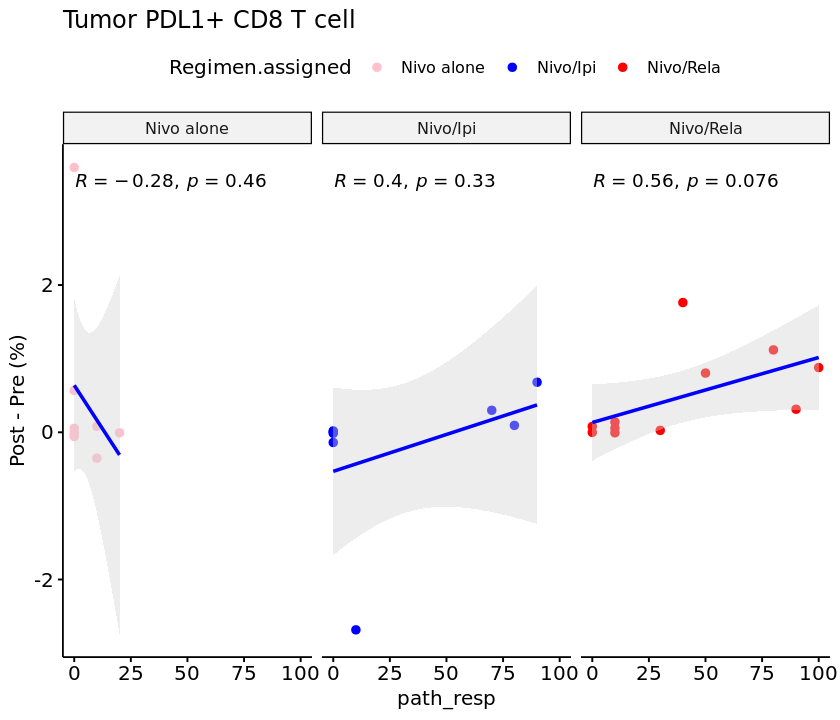

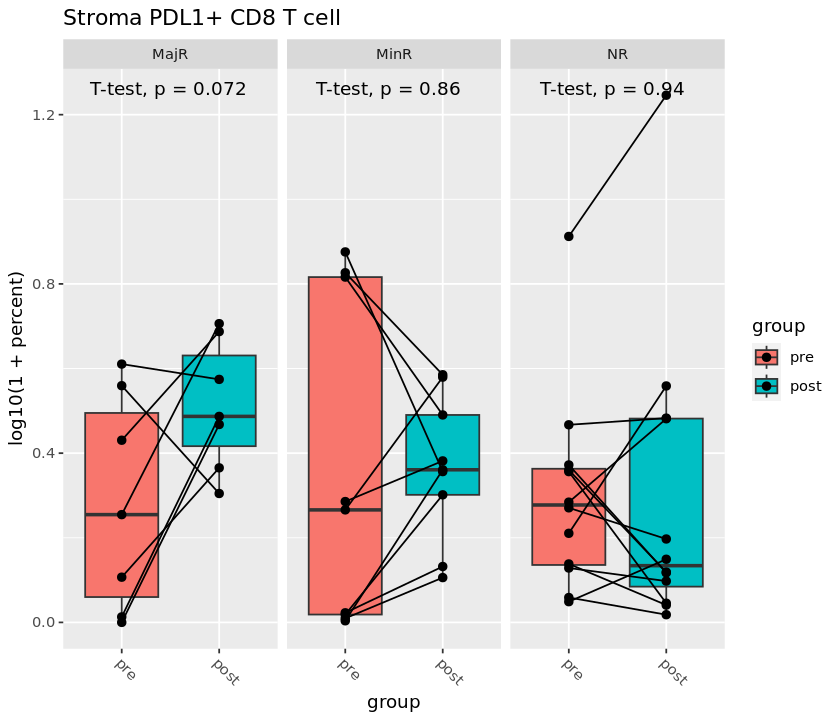

In [55]:
fn <- 'clin_cell_density_56_paired_good_samples_all_inc_tumor_stroma_19_percent_v4.csv'
use.percents=c('CD3.CD8.PDL1_tumor_percent','CD3.CD8.PDL1_stroma_percent')
df_clin <- read.csv(file.path(results,fn))
use.df <- df_clin %>% filter(pt_id %in% paired_pt)

options(repr.plot.width=7,repr.plot.height=6)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1[,use.percents[1]]
# d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor PDL1+ CD8 T cell') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

paired <- pivot_wider(d1[,c('Study_ID','group',
                        'Regimen.assigned',
                        'percent','Path_response')],
                      names_from="group", 
                values_from = "percent")
paired$diff <- paired$post - paired$pre
paired$path_resp <- as.numeric(paired$Path_response)*-1
p1 <- ggscatter(paired, x = "path_resp", y = "diff",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle('Tumor PDL1+ CD8 T cell') + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") #, label.x = 1.3, label.y = 1.5

p1 <- ggscatter(paired, x = "path_resp", y = "diff",
    color="Regimen.assigned",
    palette = c("Nivo/Rela" = "red", "Nivo/Ipi" = "blue", "Nivo alone" = "pink"),
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   ) + ggtitle('Tumor PDL1+ CD8 T cell') + ylab('Post - Pre (%)') # + xlim(c(1.25,1.55)) + ylim(c(1.5,2.0))
p1 + stat_cor(method = "pearson") + 
    facet_wrap(~Regimen.assigned) #, label.x = 1.3, label.y = 1.5


# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1[,use.percents[2]]
d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma PDL1+ CD8 T cell') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)



## CD8/Treg ratios

[1] 58 31

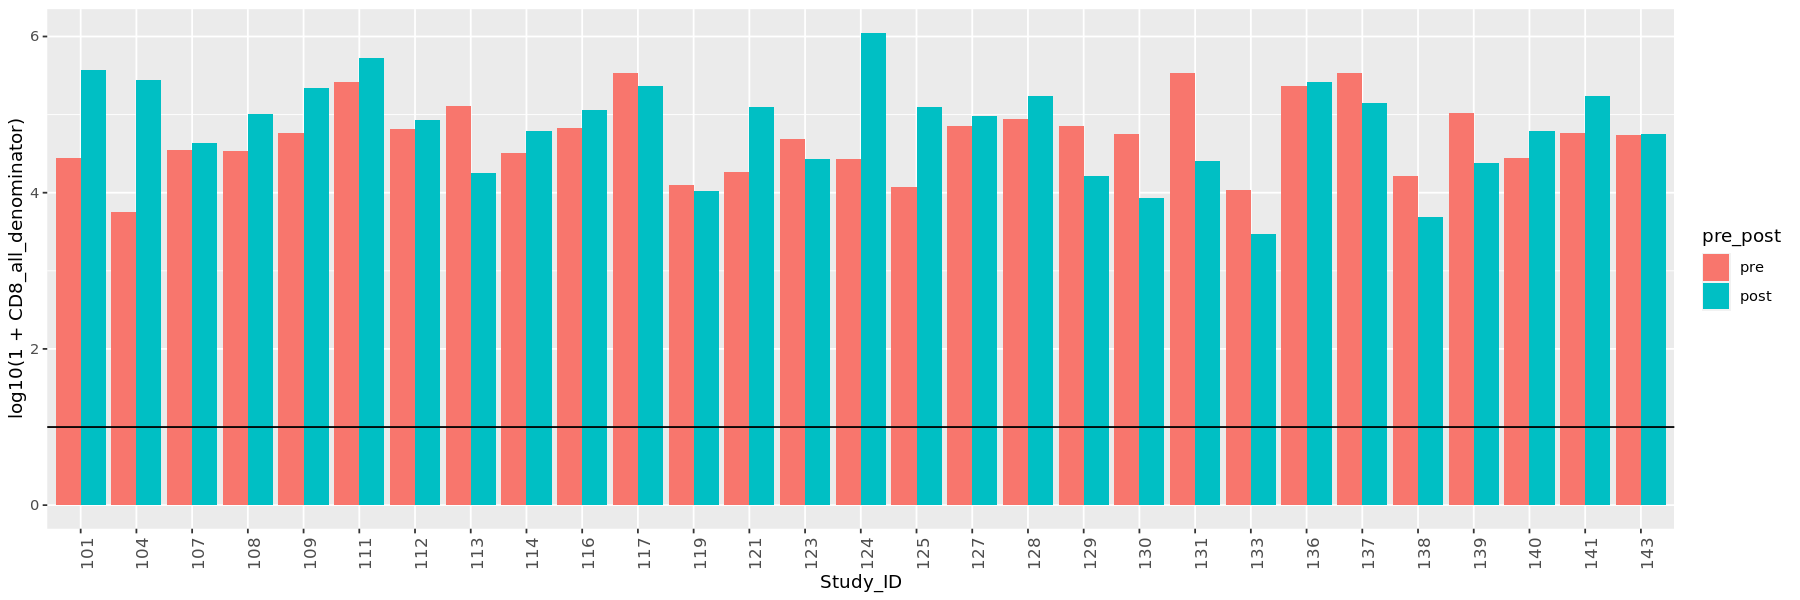

In [79]:
df.counts <- read.csv(file.path(results,'cell_density_58_paired_good_samples_all_inc_tumor_stroma_28_counts.csv'))
df.counts$pt_id <- df.counts$Study_ID
df.counts$arm <- df.counts$Regimen.assigned
df.counts$time_point<-df.counts$pre_post
df.counts <- df.counts %>% filter(pt_id %in% paired_pt)
dim(df.counts)
df.counts <- merge(df.counts,clin,how='left',by='Study_ID')
df.counts$group <- factor(df.counts$time_point, levels=c('pre','post'))
options(repr.plot.width=15,repr.plot.height=5)
d1 <- df.counts
d1$Study_ID <- factor(df.counts$Study_ID,
                         levels=as.factor(sort(unique(df.counts$Study_ID))))
d1$pre_post <- factor(df.counts$pre_post,
                      levels = c('pre','post'))
ggplot(d1, aes(x=Study_ID,
                 y=log10(1+CD8_all_denominator),
                    fill=pre_post)) +
       geom_bar(stat='identity',
                position = position_dodge(width = 0.9)) + 
       theme(axis.text.x = element_text(angle = 90, size = 10)) +
       geom_hline(aes(yintercept=1))

In [60]:
df.sup <- read.csv(file.path(results,'qupath_cell_density_4_samples_all_inc_tumor_stroma_19_counts.csv'))
row.names(df.sup)<-df.sup$tissue_id
colnames(df.sup)

[1] "tissue_id"                  "CD8_CD3_tumor_counts"      
 [3] "CD8_CD3_tumor_denominator"  "CD8_CD3_stroma_counts"     
 [5] "CD8_CD3_stroma_denominator" "CD8_CD3_all_counts"        
 [7] "CD8_CD3_all_denominator"    "Treg_tumor_counts"         
 [9] "Treg_tumor_denominator"     "Treg_stroma_counts"        
[11] "Treg_stroma_denominator"    "Treg_all_counts"           
[13] "Treg_all_denominator"       "PDL1_tumor_counts"         
[15] "PDL1_tumor_denominator"     "PDL1_stroma_counts"        
[17] "PDL1_stroma_denominator"    "PDL1_all_counts"           
[19] "PDL1_all_denominator"

[1] 58 31

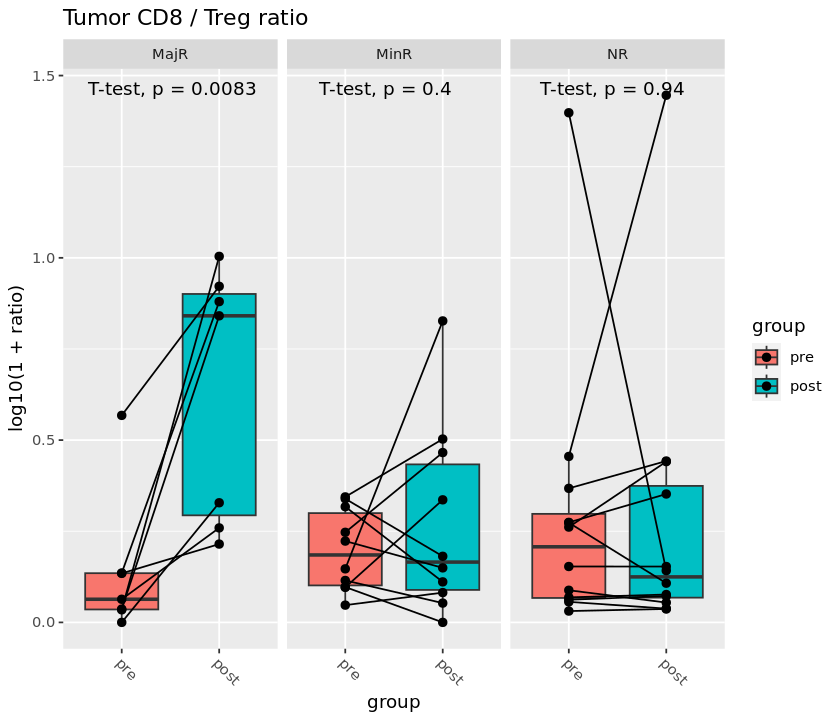

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Computation failed in `stat_compare_means()`
Caused by error in `complete.cases()`:
! not all arguments have the same length”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


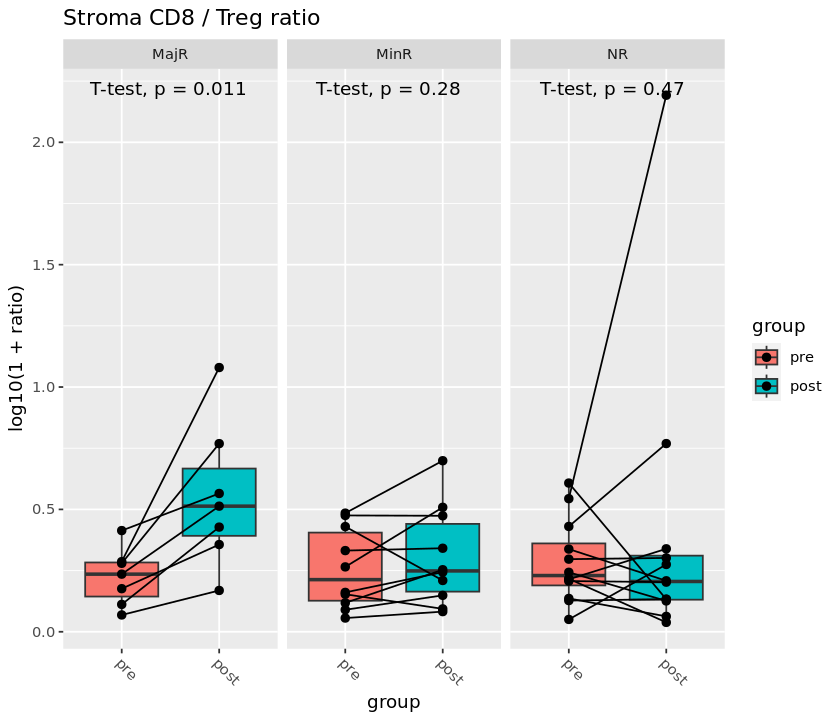

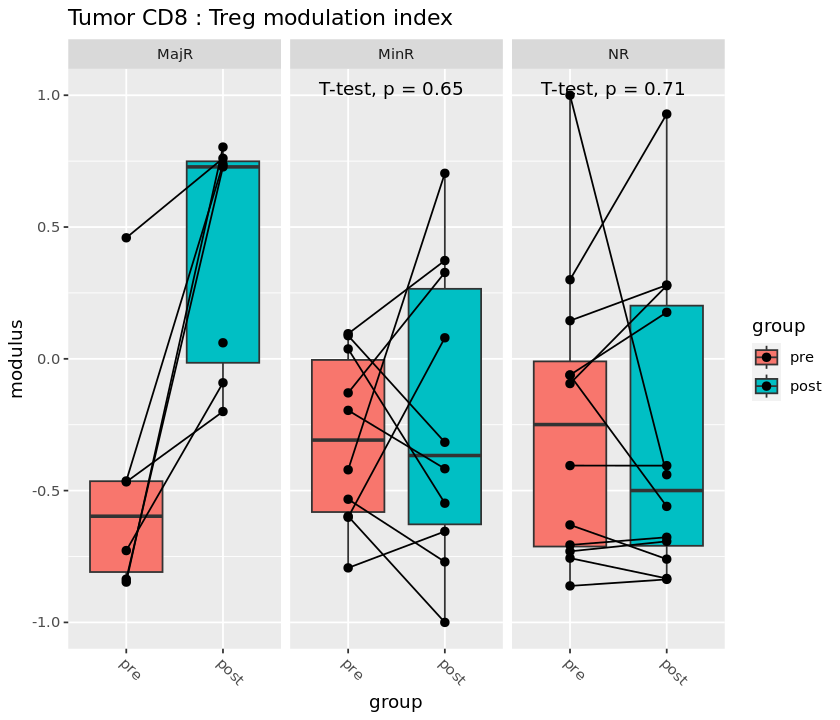

In [62]:
options(repr.plot.width=7,repr.plot.height=6)
# df.counts <- read.csv(file.path(results,'cell_density_58_paired_good_samples_all_inc_tumor_stroma_28_counts.csv'))
df.counts <- read.csv(file.path(results,'cell_density_58_paired_good_samples_all_inc_tumor_stroma_28_counts_v2.csv'))
use_qupath_108 <- TRUE
use_qupath_108_treg <- TRUE
df.counts$pt_id <- df.counts$Study_ID
df.counts$arm <- df.counts$Regimen.assigned
df.counts$time_point<-df.counts$pre_post
df.counts <- df.counts %>% filter(pt_id %in% paired_pt)
dim(df.counts)
df.counts <- merge(df.counts,clin,how='left',by='Study_ID')
df.counts$group <- factor(df.counts$time_point, levels=c('pre','post'))
d1 <- df.counts
cd8_counts <- d1$CD3.CD8.PD1neg_tumor_counts + d1$CD3.CD8.PD1_tumor_counts
if (use_qupath_108){
    idx <- d1$pt_id == '108' & d1$time_point == 'pre'
    cd8_counts[idx] <- df.sup['108_pre','CD8_CD3_tumor_counts']
    if (use_qupath_108_treg){
        d1$Treg_tumor_counts[idx] <- df.sup['108_pre','Treg_tumor_counts']
    }
    idx <- d1$pt_id == '108' & d1$time_point == 'post'
    cd8_counts[idx] <- df.sup['108_post','CD8_CD3_tumor_counts']
    if (use_qupath_108_treg){
        d1$Treg_tumor_counts[idx] <- df.sup['108_post','Treg_tumor_counts']
    }
}


d1$ratio <- cd8_counts / (d1$Treg_tumor_counts+1)
d1$modulus <- (cd8_counts - d1$Treg_tumor_counts) / (cd8_counts + d1$Treg_tumor_counts)

# compare_means(ratio ~ group, data = d1, paired = TRUE,
#              method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1+ratio),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor CD8 / Treg ratio') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

cd8_counts_stroma <- d1$CD3.CD8.PD1neg_stroma_counts + d1$CD3.CD8.PD1_stroma_counts
d1$ratio <- cd8_counts_stroma / (d1$Treg_stroma_counts+1)
ggplot(d1, aes(x=group,
                 y=log10(1+ratio),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma CD8 / Treg ratio') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

# Modulus index 
ggplot(d1, aes(x=group,
                 y= modulus,
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor CD8 : Treg modulation index') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)



# Proportion of PD1+ CD3/CD8

[1] 56 31

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Computation failed in `stat_compare_means()`
Caused by error in `complete.cases()`:
! not all arguments have the same length”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Computation failed in `stat_compare_means()`
Caused by error in `complete.cases()`:
! not all arguments have the same length”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


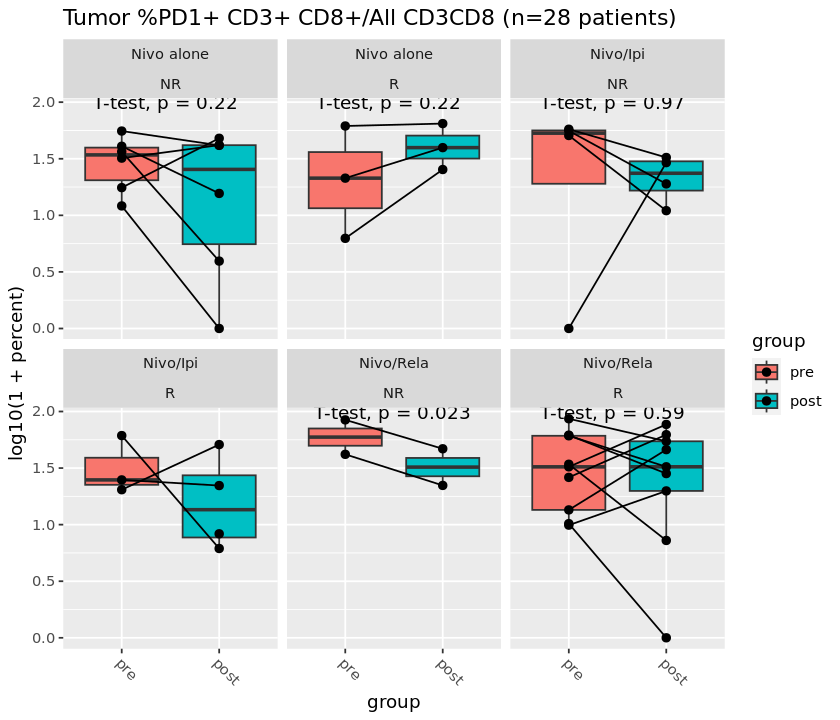

Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Computation failed in `stat_compare_means()`
Caused by error in `complete.cases()`:
! not all arguments have the same length”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


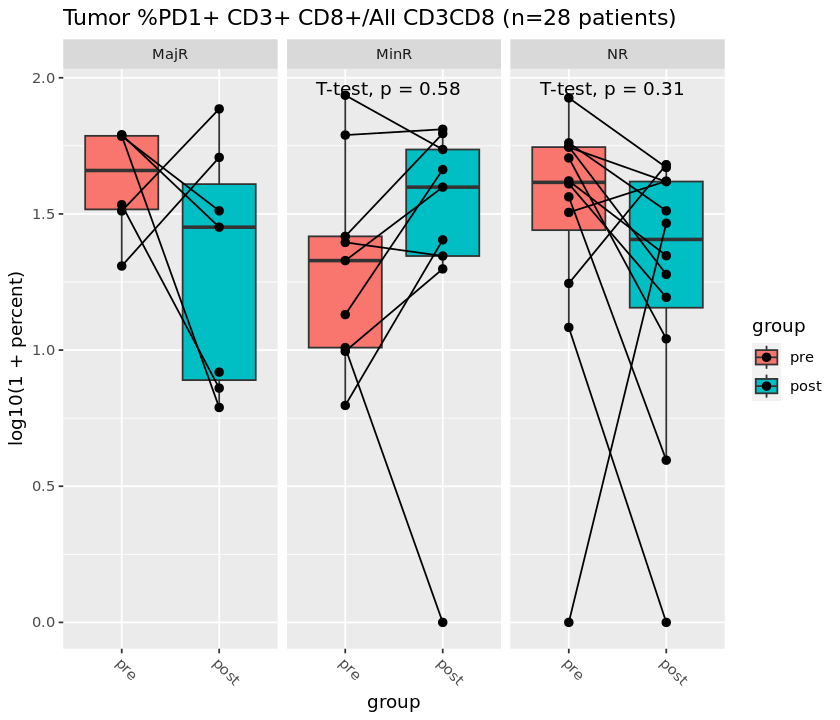

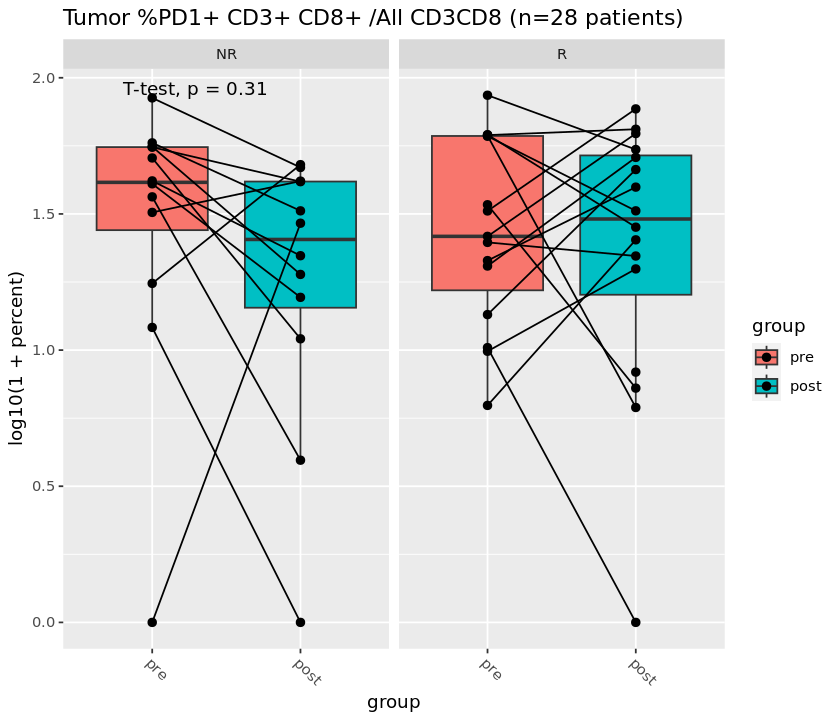

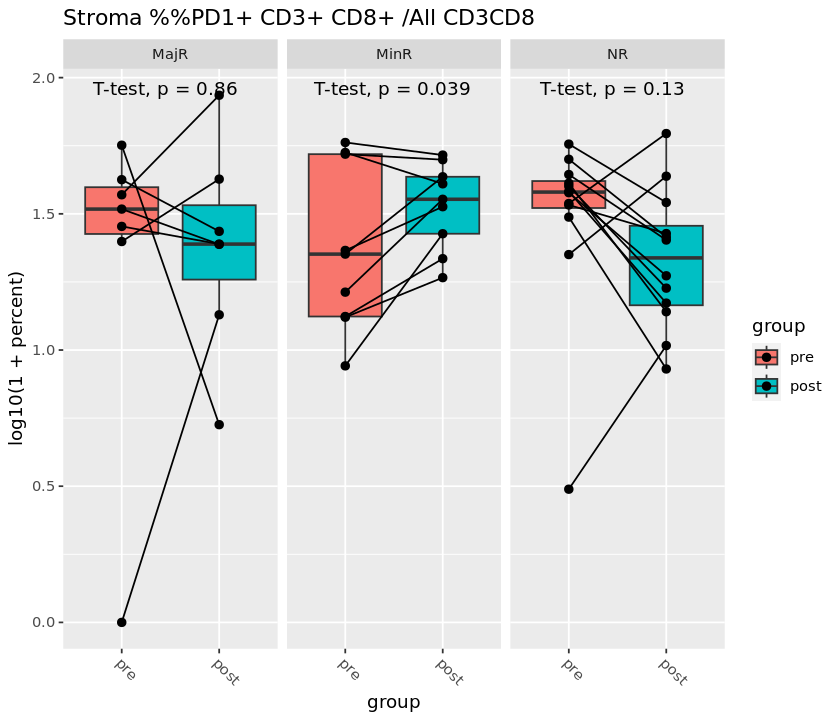

In [80]:
use_qupath_108 <- FALSE
drop_108 <- FALSE
df.counts <- read.csv(file.path(results,'cell_density_58_paired_good_samples_all_inc_tumor_stroma_28_counts_v2.csv'))
df.sup <- read.csv(file.path(results,'qupath_cell_density_4_samples_all_inc_tumor_stroma_10_percent.csv'))
row.names(df.sup)<-df.sup$tissue_id
# colnames(df.sup)
df.counts$pt_id<- factor(df.counts$Study_ID,
                         levels=as.factor(sort(unique(df.counts$Study_ID))))
df.counts$pre_post <- factor(df.counts$pre_post,
                      levels = c('pre','post'))
df.counts$arm <- df.counts$Regimen.assigned
df.counts$time_point<-df.counts$pre_post
df.counts <- df.counts %>% filter(pt_id %in% paired_pt)

dim(df.counts)
df.counts <- merge(df.counts,clin,how='left',by='Study_ID')
df.counts$group <- factor(df.counts$time_point, levels=c('pre','post'))

d1 <- df.counts
d1$percent <- (d1$CD3.CD8.PD1_tumor_counts) / (d1$CD3.CD8.PD1_tumor_counts + d1$CD3.CD8.PD1neg_tumor_counts) * 100

if (use_qupath_108){
    idx <- d1$pt_id == '108' & d1$time_point == 'pre'
    d1[idx,'percent'] <- df.sup['108_pre','CD8_CD3_tumor_percent']
    idx <- d1$pt_id == '108' & d1$time_point == 'post'
    d1[idx,'percent'] <- df.sup['108_post','CD8_CD3_tumor_percent']
}
if (drop_108){
    idx <- !(d1$pt_id == '108')
    d1 <- d1[idx,]
    }
n_pt = length(unique(df.counts$pt_id))
options(repr.plot.width=15,repr.plot.height=6)
options(repr.plot.width=7,repr.plot.height=6)
ggplot(d1, aes(x=group,
                 y=log10(1+percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(sprintf('Tumor %%PD1+ CD3+ CD8+/All CD3CD8 (n=%d patients)',n_pt)) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~arm * any_resp)

ggplot(d1, aes(x=group,
                 y=log10(1+percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(sprintf('Tumor %%PD1+ CD3+ CD8+/All CD3CD8 (n=%d patients)',n_pt)) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)

ggplot(d1, aes(x=group,
                 y=log10(1+percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle(sprintf('Tumor %%PD1+ CD3+ CD8+ /All CD3CD8 (n=%d patients)',n_pt)) +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~any_resp)

d1$percent <- (d1$CD3.CD8.PD1_stroma_counts) / (d1$CD3.CD8.PD1_stroma_counts + d1$CD3.CD8.PD1neg_stroma_counts) * 100
options(repr.plot.width=7,repr.plot.height=6)
ggplot(d1, aes(x=group,
                 y=log10(1+percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma %%PD1+ CD3+ CD8+ /All CD3CD8') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~resp_cat)


# Tumor v. stroma by response

## CD3/CD8 T 

In [1]:
use.df <- df %>% filter(pt_id %in% paired_pt)
options(repr.plot.width=7,repr.plot.height=6)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$CD8_tumor_percent
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor CD3+/CD8+ T (inclusive)') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~arm)




# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$CD8_stroma_percent
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma CD3+/CD8+ T (inclusive)') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~arm)



ERROR: Error in df %>% filter(pt_id %in% paired_pt): could not find function "%>%"


# Tumor v Stroma for all regimens

## CD3/CD8 T 

In [ ]:
df_clin <- df_clin <-read.csv(file.path(results,'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent.csv'))
use.df <- df_clin %>% filter(pt_id %in% paired_pt)

options(repr.plot.width=12,repr.plot.height=8)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$CD8_tumor_percent

compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor CD8+ T Cell') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~ arm * any_resp)




# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$CD8_stroma_percent
# d1$any_resp <- as.numeric(d1$Path_response) < -30
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma CD8+ T Cell') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~arm * any_resp)



## Treg

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.7512791,0.75,0.75,ns,T-test


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.2024285,0.2,0.2,ns,T-test


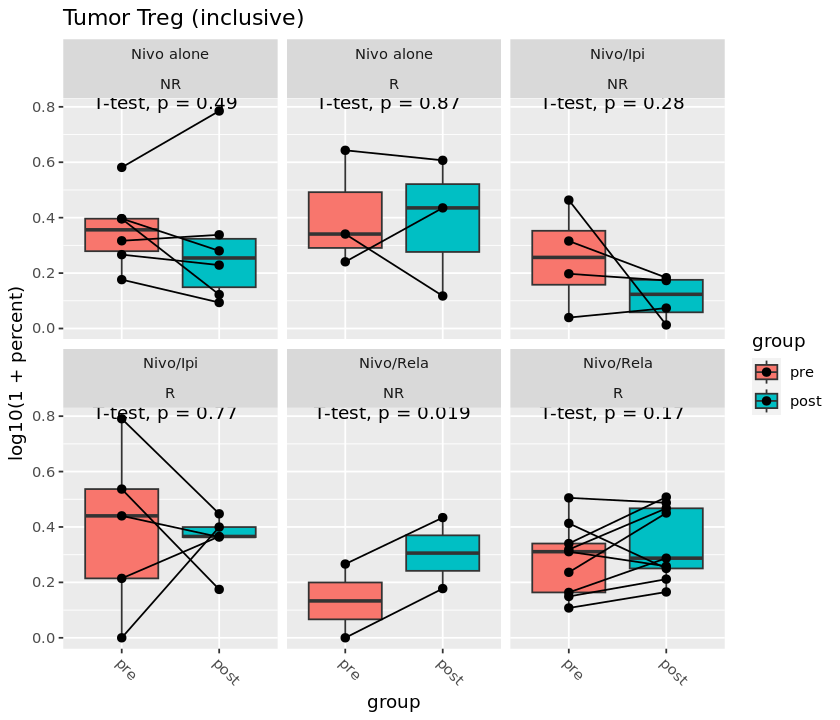

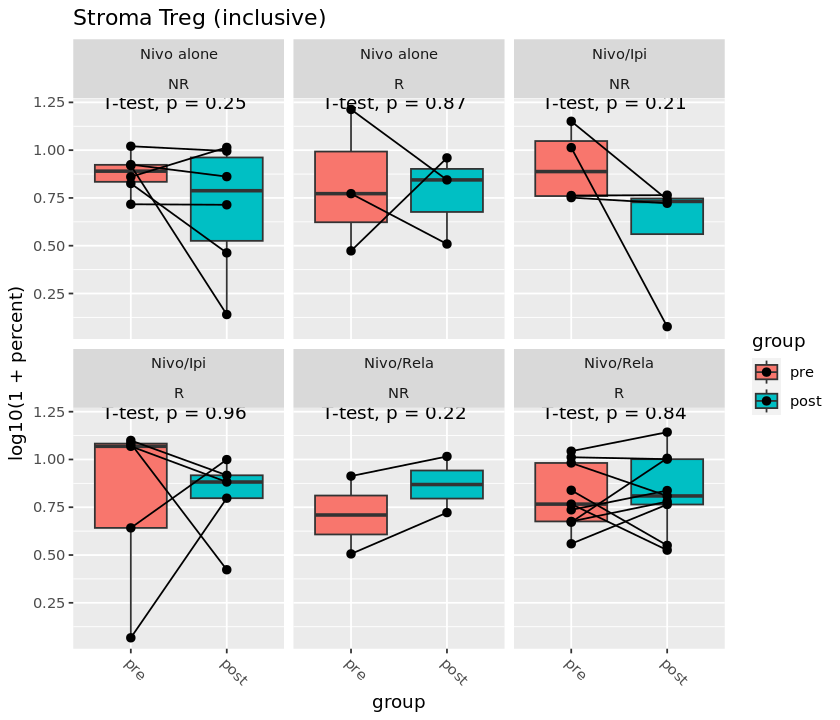

In [30]:
df_clin <- df_clin <- read.csv(file.path(results,'clin_cell_density_58_paired_good_samples_all_inc_tumor_stroma_16_percent.csv'))
use.df <- df_clin %>% filter(pt_id %in% paired_pt)
options(repr.plot.width=7,repr.plot.height=6)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$Treg_tumor_percent
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor Treg (inclusive)') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~arm * any_resp)




# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$Treg_stroma_percent
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma Treg (inclusive)') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~arm * any_resp)



## PD-L1

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.446399,0.45,0.45,ns,T-test


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
percent,pre,post,0.05254275,0.053,0.053,ns,T-test


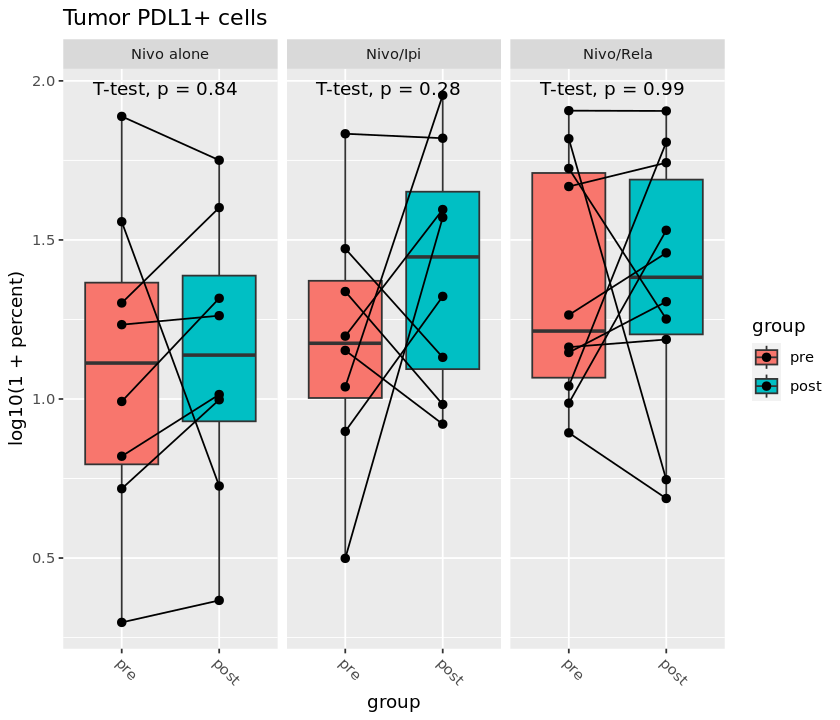

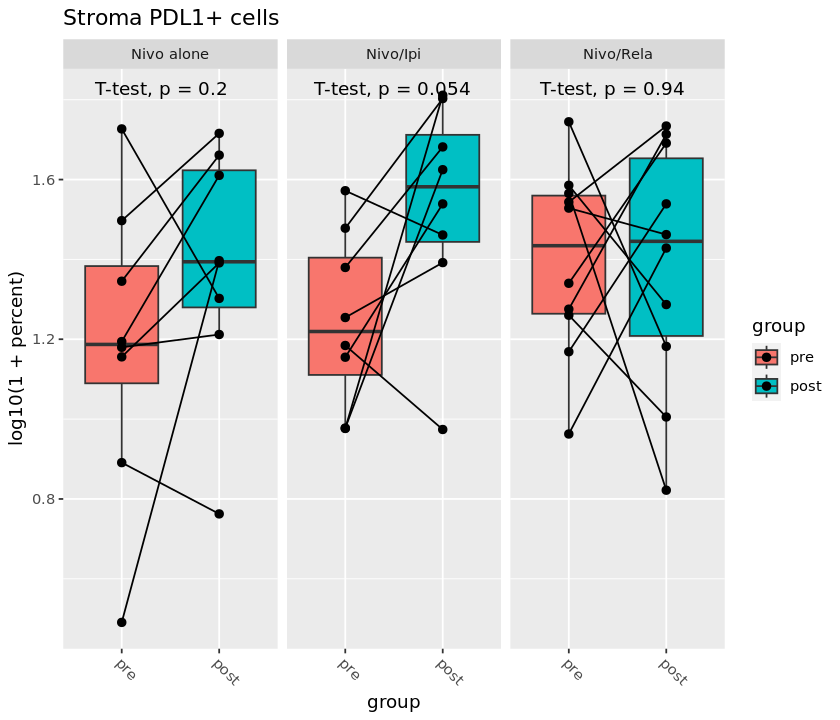

In [31]:
use.df <- df %>% filter(pt_id %in% paired_pt)
options(repr.plot.width=7,repr.plot.height=6)
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$PDL1_tumor_percent
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor PDL1+ cells') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~arm)




# ###### For t cell inclsuive:
d1 <- use.df
d1$group <- factor(d1$time_point, levels=c('pre','post'))
d1$percent <- d1$PDL1_stroma_percent
compare_means(percent ~ group, data = d1, paired = TRUE,
             method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1 + percent),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Stroma PDL1+ cells') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~arm)



## CD8/Treg ratios

[1] 52 25

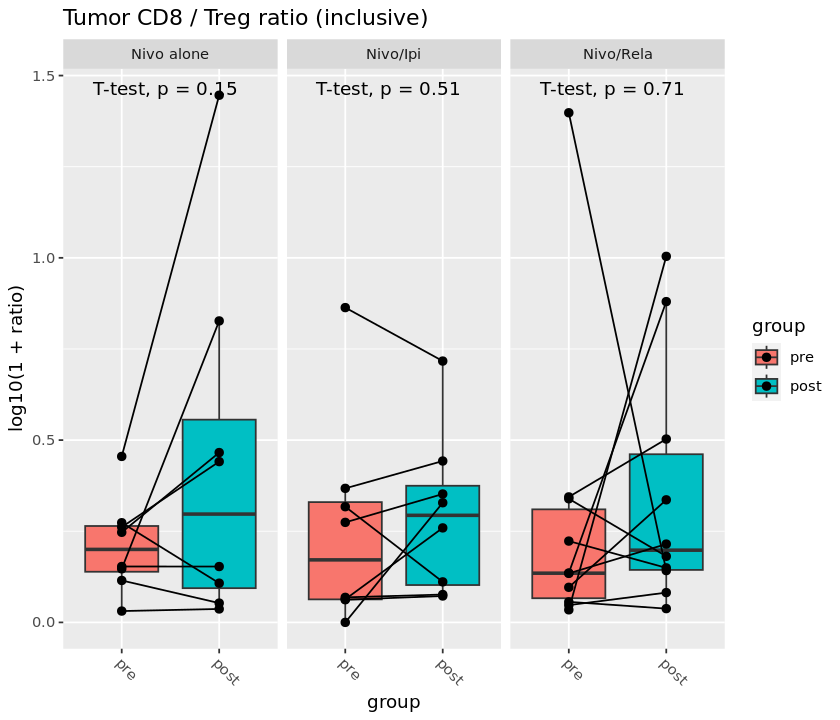

In [35]:
options(repr.plot.width=7,repr.plot.height=6)
df.counts <- read.csv(file.path(results,'cell_density_52_paired_good_samples_all_inc_tumor_stroma_22_counts.csv'))
df.counts$pt_id <- df.counts$Study_ID
df.counts$arm <- df.counts$Regimen.assigned
df.counts$time_point<-df.counts$pre_post
df.counts <- df.counts %>% filter(pt_id %in% paired_pt)
dim(df.counts)
df.counts$group <- factor(df.counts$time_point, levels=c('pre','post'))
d1 <- df.counts
d1$ratio <- d1$CD8_tumor_counts / (d1$Treg_tumor_counts+1)

# compare_means(ratio ~ group, data = d1, paired = TRUE,
#              method = "t.test")
ggplot(d1, aes(x=group,
                 y=log10(1+ratio),
                    fill=group)) +
       geom_boxplot() + geom_line(aes(group = pt_id)) + 
       geom_point(size = 2) + 
       ggtitle('Tumor CD8 / Treg ratio (inclusive)') +
       theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
    stat_compare_means(paired = TRUE, method='t.test') + 
    facet_wrap(~arm)




# # ###### For t cell inclsuive:
# d1 <- df.counts
# d1$ratio <- d1$CD8_CD3_stroma_counts / d1$Treg_stroma_counts
# # d1[d1$ratio > 10,]
# compare_means(ratio ~ group, data = d1, paired = TRUE,
#              method = "t.test")
# ggplot(d1, aes(x=group,
#                  y=log10(1 + ratio),
#                     fill=group)) +
#        geom_boxplot() + geom_line(aes(group = pt_id)) + 
#        geom_point(size = 2) + 
#        ggtitle('Stroma CD8 / Treg ratio (inclusive)') +
#        theme(axis.text.x = element_text(angle = -45,  hjust=0)) + 
#     stat_compare_means(paired = TRUE, method='t.test') + 
#     facet_wrap(~arm)



In [68]:
d1$ratio

[1]  0.51307847  0.20140105  1.12966916  0.23917228  0.27461291  1.54938272
 [7]  0.19060225  0.14993395  0.34056399  0.46889089  2.94385965  0.90909091
[13]  0.05627706  0.93631670  0.12674239  0.52654562  3.66304348  0.39199590
[19]  0.29990449  0.14919355  0.46428571  0.06696429  0.02155172  2.62500000
[25]  5.22033898  4.75000000  0.04995680  1.08624709  0.45495905  0.27666667
[31]  0.27228208  1.98561151  1.62904762  0.52018779  2.72727273  2.68421053
[37]  1.02983425  0.07812500  8.46666667  0.92156863  2.94014085  1.66182452
[43]  1.11059190         Inf  0.29887640         Inf  1.13626686  0.55609168
[49]  1.45329670  1.66014235  0.83531746  0.16582987  0.16340782  0.33432658
[55] 44.53181818  2.53736572  2.04133180  0.36652835  0.66689490  0.51139601
[61]  0.45013979  0.26145553  0.57575758  0.84390244  2.47673054  0.31629701

## Loop and correct FDR

In [ ]:
df.counts <- read.csv(file.path(results,'cell_density_71_samples_all_inc_tumor_stroma_22_counts.csv'))
df.counts <- df.counts %>% filter(pt_id %in% paired_pt)
outliers <- c(27,28,33)
dim(df.counts)
df.counts$group <- factor(df.counts$time_point, levels=c('pre','post'))

In [9]:
head(df,n=1)

,tissue_id,pt_id,arm,time_point,CD8_CD3_tumor_percent,CD8_CD3_stroma_percent,CD8_CD3_all_percent,Treg_tumor_percent,Treg_stroma_percent,Treg_all_percent,PDL1_tumor_percent,PDL1_stroma_percent,PDL1_all_percent
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MISP0099Q001,2,B,post,0.7877549,0.4406308,0.7263326,0.9074139,1.020408,0.9274078,9.757192,4.475881,8.822685


In [78]:
use.groups = c('CD8_CD3_tumor_percent','CD8_CD3_stroma_percent',
               'Treg_tumor_percent','Treg_stroma_percent',
               'PDL1_tumor_percent','PDL1_stroma_percent',
               'CD8.Treg.tumor.ratio')
n_fdr = length(use.groups)
arms = c('A','B')
use.df <- df %>% filter(pt_id %in% paired_pt)
use.df$CD8.Treg.tumor.ratio <- log10( 1 + df.counts$CD8_CD3_tumor_counts /
                                          df.counts$Treg_tumor_counts)
use.df$CD8.Treg.stroma.ratio <- log10( 1 + df.counts$CD8_CD3_stroma_counts /
                                          df.counts$Treg_stroma_counts)

all.stats = data.frame(c())
for (cell.group in use.groups){
    d1 <- use.df
    d1$group <- factor(d1$time_point, levels=c('pre','post'))
    d1$percent <-d1[,cell.group]
    d1$log_percent <- log10(1+ d1$percent)
    for (cur.arm in arms){
        d2 <- d1 %>% filter(arm == cur.arm)
        # d2$diff <- d2[group == 'post','percent'] - d2[group=='pre','percent']
        stats<- compare_means(log_percent ~ group, 
                              data = d2, 
                              paired = TRUE,
                              method = "t.test")
        stats$.y. <- cell.group
        stats$arm <- cur.arm
        cdata <- plyr::ddply(d2, c("group", "arm"), summarise,
               N    = length(log_percent),
               mean = mean(log_percent),
               sd   = sd(log_percent),
               se   = sd / sqrt(N)
            )
        cdata$arm <-NULL
        stats <-cbind(stats,cdata %>%  tidyr::pivot_wider(names_from = group, values_from = c('N','mean','sd','se')))
        all.stats <- rbind(all.stats,stats)
        }
    
    } 
# for (cur.arm in arms){
#     idx = all.stats$arm == cur.arm
#     p.adj <- p.adjust(all.stats[idx,'p'], method="fdr")
#     all.stats[idx,'p.adj'] <- p.adj
# }
    
all.stats$p.adj <- p.adjust(all.stats$p, method="fdr")
all.stats$mean.diff <- all.stats$mean_post - all.stats$mean_pre
all.stats[,c('p.format','p.signif')]<-NULL
all.stats

.y.,group1,group2,p,p.adj,method,arm,N_pre,N_post,mean_pre,mean_post,sd_pre,sd_post,se_pre,se_post,mean.diff
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD8_CD3_tumor_percent,pre,post,0.3439955451,0.651628719,T-test,A,18,18,0.37147948,0.31384243,0.29333234,0.17726347,0.06913909,0.04178140,-0.057637045
CD8_CD3_tumor_percent,pre,post,0.4654490847,0.651628719,T-test,B,15,15,0.31451978,0.25828845,0.23745786,0.17083396,0.06131136,0.04410914,-0.056231325
CD8_CD3_stroma_percent,pre,post,0.0508182537,0.142291110,T-test,A,18,18,0.48326926,0.32980651,0.31653157,0.21660763,0.07460721,0.05105491,-0.153462748
CD8_CD3_stroma_percent,pre,post,0.0093218606,0.043502016,T-test,B,15,15,0.55113147,0.28169688,0.32304512,0.14573772,0.08340989,0.03762932,-0.269434592
Treg_tumor_percent,pre,post,0.5212860378,0.663454957,T-test,A,18,18,0.41365762,0.45529880,0.18376226,0.17133369,0.04331318,0.04038374,0.041641185
Treg_tumor_percent,pre,post,0.4301453745,0.651628719,T-test,B,15,15,0.34864347,0.31168414,0.23294790,0.16557340,0.06014689,0.04275087,-0.036959335
Treg_stroma_percent,pre,post,0.0626108450,0.146091972,T-test,A,18,18,0.60974592,0.47069203,0.25170765,0.19879728,0.05932806,0.04685697,-0.139053887
Treg_stroma_percent,pre,post,0.0047597845,0.033318491,T-test,B,15,15,0.55847844,0.33969506,0.28191287,0.18817386,0.07278959,0.04858628,-0.218783385
PDL1_tumor_percent,pre,post,0.0001514462,0.002120246,T-test,A,18,18,0.63656968,1.06958164,0.52059023,0.39044877,0.12270429,0.09202966,0.433011959
